In [7]:
# written from scratch
# ver 2.0
# Using a 2D potential U(x,y) = (x^2-1)^2 + y^2

import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --initialisation--

# 1) system set up
N = 100 # no. of particles
init_pos = [[0, random.uniform(-2.0, 2.0)]  for i in range(N)] # initial positions {x,y}
init_vel = [[random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)] for i in range(N)] # initial velocities {vx, vy}
masses = [1.0 for i in range(N)] # masses of each of the particles

# 2) defining forcefield 
# function to calculate force
# partial derivatives to calculate Fx and Fy
# Fx = -dU/dx , Fy = -dU/dy ; U(x,y) = (x^2-1)^2 + y^2
def calc_force(position_2D): # In the format [x,y]
    Fx = -4 * position_2D[0] * (position_2D[0]**2 - 1) 
    Fy = -2 * position_2D[1]
    return [Fx, Fy] # Outputs in a vector form as a list

# 3) simlulation parameters
n_steps = 10000
dt = 0.001 # time step

# --simulation--
time = 0.0
positions = list(init_pos)
velocities = list(init_vel)
velocities_half = []

# lists to save trajectory data
all_times = []
all_positions = []
all_velocities = []
all_KE = []
all_PE = []
all_TE = []

# main loop: integrator (3 step velocity verlet)
for step in range(n_steps):
    
    # calculating forces at the beginning of the loop
    forces = [calc_force(positions[i]) for i in range(N)] 
    
    # calculating x and y components of velocities at dt/2 according to these forces 
    velocities_half_temp = []
    positions_temp = []

    for i in range(N):
        velocities_x_half = velocities[i][0] + 0.5*dt *forces[i][0]/masses[i]  
        velocities_y_half = velocities[i][1] + 0.5*dt *forces[i][1]/masses[i]  
        velocities_half_temp.append([velocities_x_half, velocities_y_half])
        
    # calculating positions at dt
        positions_x = positions[i][0] + dt*velocities_x_half
        positions_y = positions[i][1] + dt*velocities_y_half
        positions_temp.append([positions_x, positions_y])
    positions = positions_temp
        
    # recaclculating forces for new positions (dt)
    forces = [calc_force(positions[i]) for i in range(N)]

    # calculating velocities at dt according to the new forces
    velocities_temp = []
    for i in range(N):
        velocities_x = velocities_half_temp[i][0] + 0.5*dt *forces[i][0]/masses[i] 
        velocities_y = velocities_half_temp[i][1] + 0.5*dt *forces[i][1]/masses[i] 
        velocities_temp.append([velocities_x, velocities_y])
    velocities = velocities_temp
        
    # calculating PE, KE, and TE
    KE = sum(0.5 * masses[i] * (velocities[i][0]**2 + velocities[i][1]**2) for i in range(N))
    PE = sum(((positions[i][0]**2 - 1)**2 + positions[i][1]**2) for i in range(N))
    TE = KE + PE
    
    time += dt

    # saving the positions and velocities 
    all_times.append(time)
    all_positions.append(positions)
    all_velocities.append(velocities)
    all_PE.append(PE)
    all_KE.append(KE)
    all_TE.append(TE)

    if step%(n_steps/10) == 0 or step == n_steps-1: # terminal output once every 100 steps
        print(f"Step: {step}, Time: {time:.2f}")

print("Simulation finished.")

# --data storage--
data = {'time': all_times}

for i in range(N):
    data[f'particle_{i}_x'] = [x[i][0] for x in all_positions]
    data[f'particle_{i}_y'] = [y[i][1] for y in all_positions]    
    data[f'particle_{i}_vx'] = [vx[i][0] for vx in all_velocities]
    data[f'particle_{i}_vy'] = [vy[i][1] for vy in all_velocities]

# Create a df
df = pd.DataFrame(data)
df['PE'] = all_PE
df['KE'] = all_KE
df['TE'] = all_TE

# output CSV
#df.to_csv('md_out.csv', index=False)
#print(f'Output CSV file: md_out.csv')

Step: 0, Time: 0.00
Step: 1000, Time: 1.00
Step: 2000, Time: 2.00
Step: 3000, Time: 3.00
Step: 4000, Time: 4.00
Step: 5000, Time: 5.00
Step: 6000, Time: 6.00
Step: 7000, Time: 7.00
Step: 8000, Time: 8.00
Step: 9000, Time: 9.00
Step: 9999, Time: 10.00
Simulation finished.


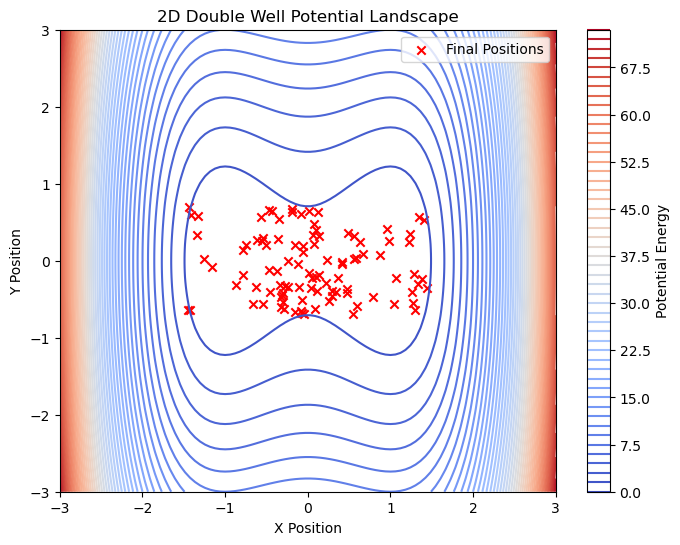

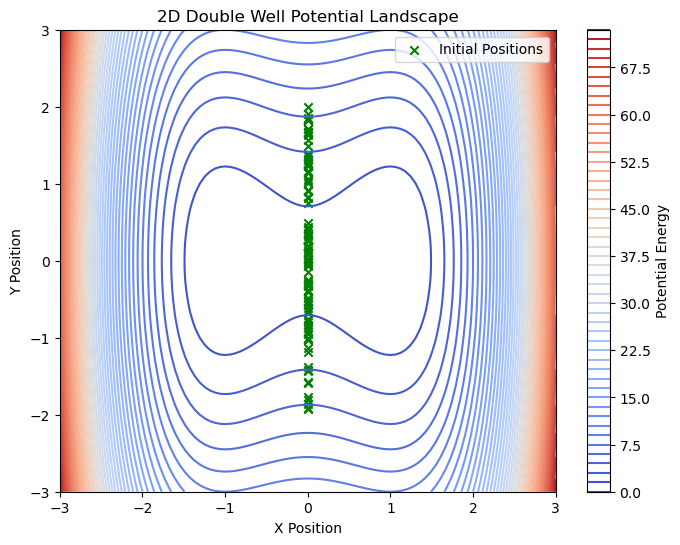

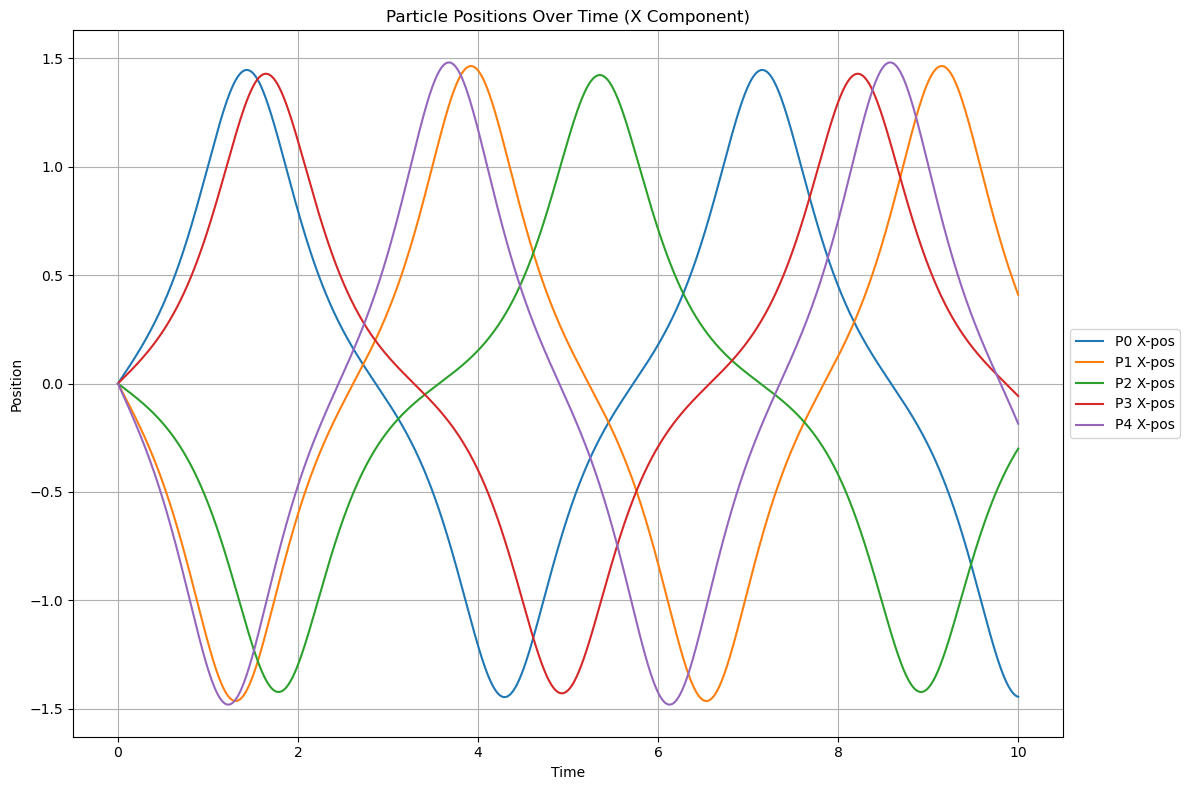

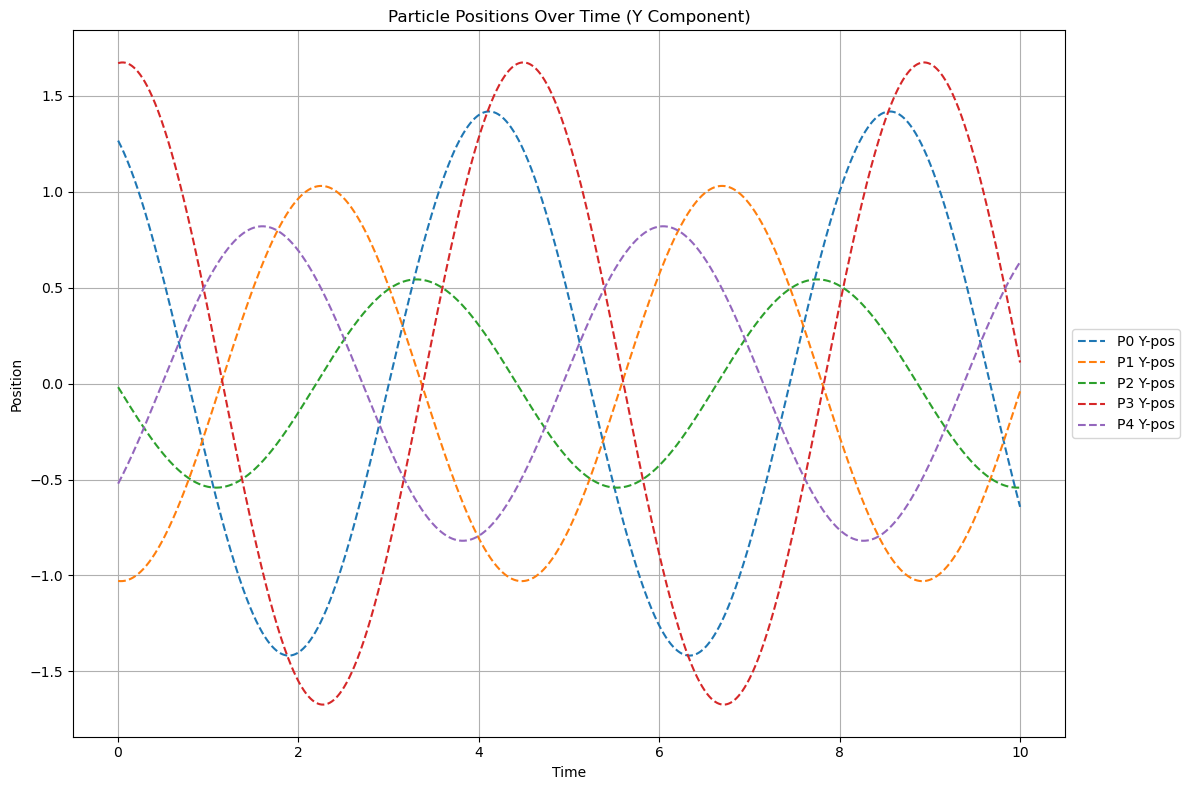

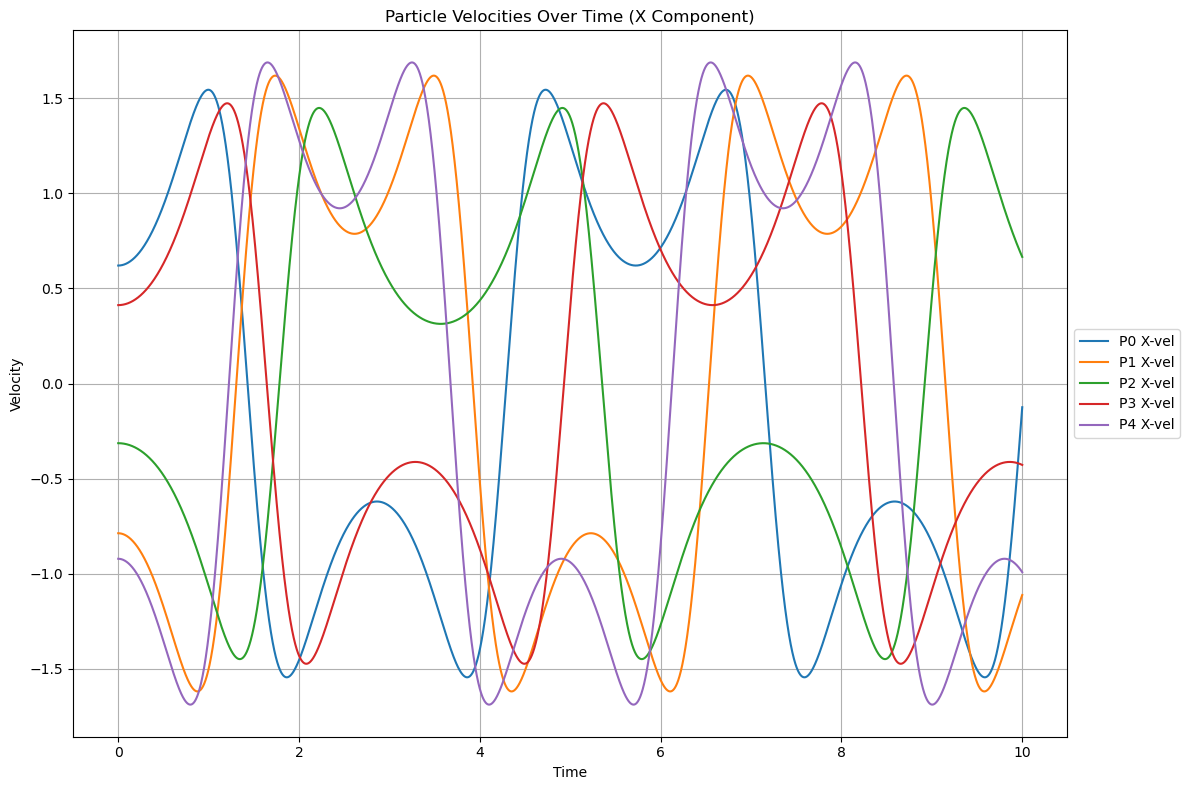

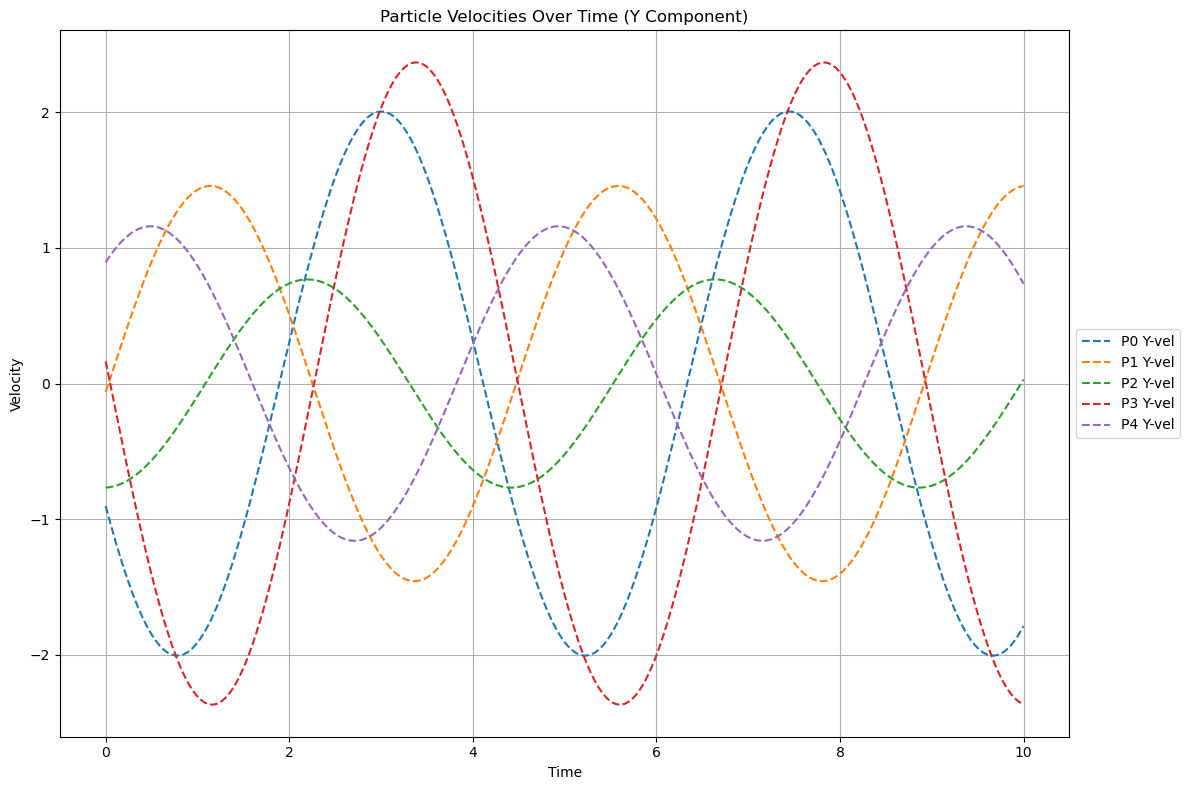

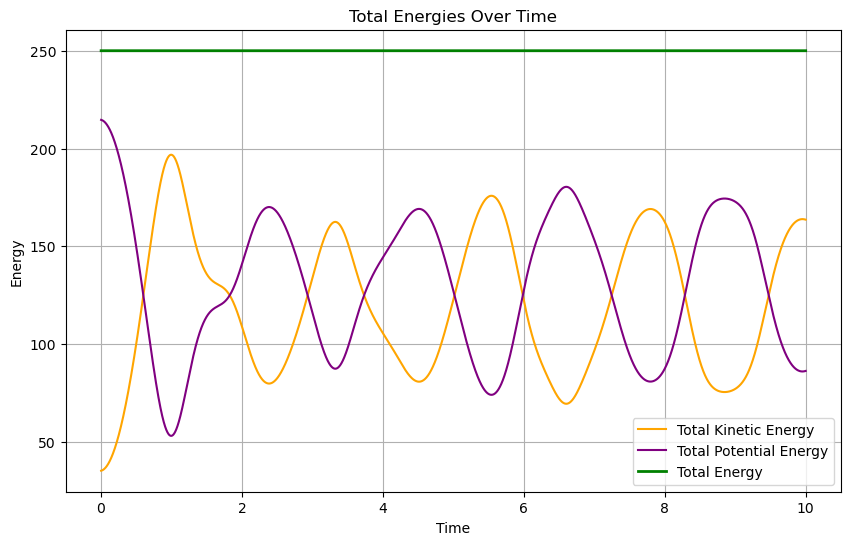

In [8]:
# plotting
final_x = [pos[0] for pos in all_positions[-1]]
final_y = [pos[1] for pos in all_positions[-1]]
initial_x = [pos[0] for pos in all_positions[0]]
initial_y = [pos[1] for pos in all_positions[0]]
X_grid, Y_grid = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z_potential =  (X_grid**2 - 1)**2 + Y_grid**2

# final positions
plt.figure(figsize=(8, 6))
plt.contour(X_grid, Y_grid, Z_potential, levels=50, cmap='coolwarm')
plt.colorbar(label='Potential Energy')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Double Well Potential Landscape')
plt.scatter(final_x, final_y, color='red', marker='x', label='Final Positions') # Overlay final positions
plt.legend()
plt.show()

# initial positions
plt.figure(figsize=(8, 6))
plt.contour(X_grid, Y_grid, Z_potential, levels=50, cmap='coolwarm')
plt.colorbar(label='Potential Energy')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Double Well Potential Landscape')
plt.scatter(initial_x, initial_y, color='green', marker='x', label='Initial Positions') 
plt.legend()
plt.show()

particles_to_plot_trajectories = min(5, N) # Plot up to 5 particles for clarity

# position (x) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_x'], label=f'P{i} X-pos', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Particle Positions Over Time (X Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# position (y) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_y'], label=f'P{i} Y-pos', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Particle Positions Over Time (Y Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# velocity (x) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_vx'], label=f'P{i} X-vel', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Particle Velocities Over Time (X Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# velocity (y) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_vy'], label=f'P{i} Y-vel', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Particle Velocities Over Time (Y Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# Energy
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['KE'], label='Total Kinetic Energy', color='orange')
plt.plot(df['time'], df['PE'], label='Total Potential Energy', color='purple')
plt.plot(df['time'], df['TE'], label='Total Energy', color='green', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Total Energies Over Time')
plt.legend()
plt.grid(True)
plt.show()

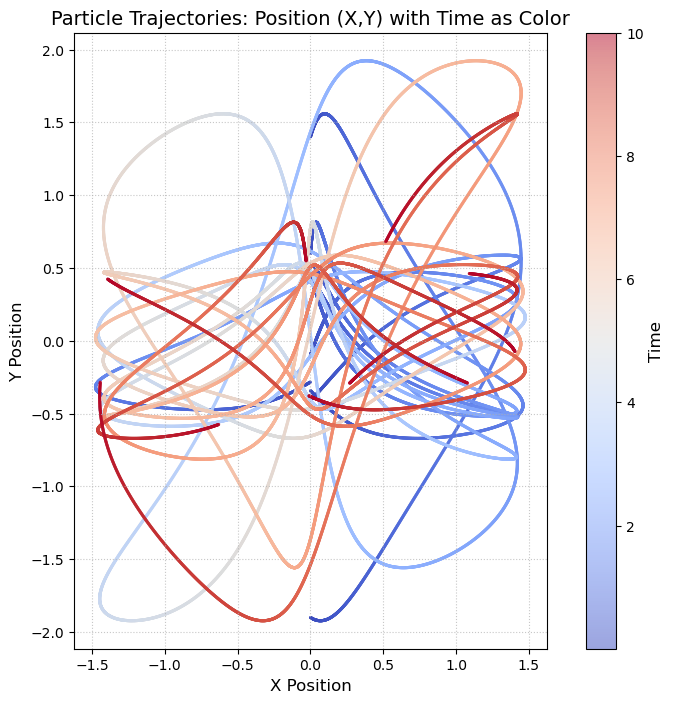

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # For potential landscape grid

# Assuming your DataFrame 'df' is already created from the simulation results
# df contains 'time', 'particle_i_x', 'particle_i_y', 'particle_i_vx', 'particle_i_vy' columns
# N (number of particles) is also assumed to be defined.

# --- Plotting 2D Position with Time as Color ---

plt.figure(figsize=(10, 8))

# Flatten the position data and corresponding times
# We need a list of all x-coords, all y-coords, and corresponding time for each point
all_x_coords = []
all_y_coords = []
all_times_flat = []

# Loop through each time step (row in the DataFrame)
for index, row in df.iterrows():
    current_time = row['time']
    for i in range(10):
        all_x_coords.append(row[f'particle_{i}_x'])
        all_y_coords.append(row[f'particle_{i}_y'])
        all_times_flat.append(current_time)

# Create the scatter plot
# c=all_times_flat tells matplotlib to color points based on the time value
# cmap='viridis' (or 'plasma', 'jet', 'coolwarm', etc.) specifies the colormap
# s=5 adjusts the marker size
# alpha=0.5 makes points semi-transparent, useful for overlapping trajectories
scatter = plt.scatter(all_x_coords, all_y_coords, 
                      c=all_times_flat, cmap='coolwarm', 
                      s=5, alpha=0.5, edgecolor='none') # edgecolor='none' for cleaner look

plt.xlabel('X Position', fontsize=12)
plt.ylabel('Y Position', fontsize=12)
plt.title('Particle Trajectories: Position (X,Y) with Time as Color', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.7)
plt.gca().set_aspect('equal', adjustable='box') # Keep aspect ratio square

# Add a color bar to show what time each color represents
cbar = plt.colorbar(scatter)
cbar.set_label('Time', fontsize=12)

plt.show()

Total simulation steps: 1000
Rendering 1000 frames (skipping every 1 steps)
Saving animation to particle_dynamics_fast.mp4...
Animation saved successfully!


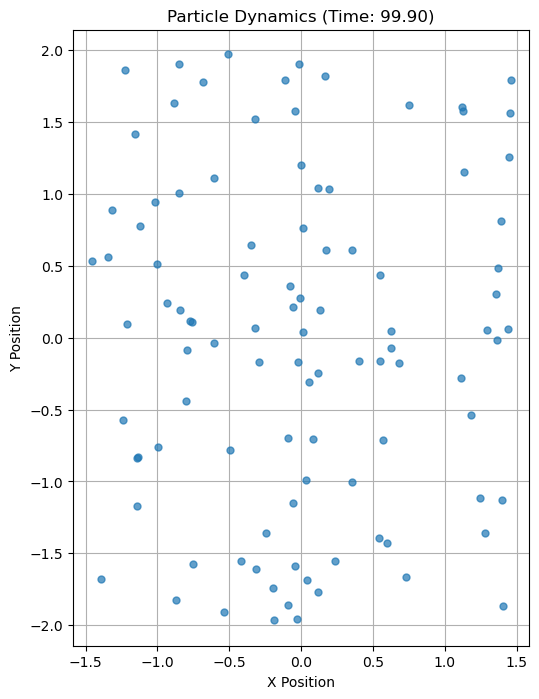

In [5]:
# feature to animate trajectory

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np

# Assuming 'df' DataFrame is already created from your simulation results
# N (number of particles) is also assumed to be defined.

# --- Prepare Data for Faster Access ---
# Convert relevant columns to NumPy arrays once for faster slicing in animate()
# This creates a list of NumPy arrays, where each array is (num_frames, 2) for x,y
# or (num_frames,) for individual particle components
particle_x_data = [df[f'particle_{i}_x'].values for i in range(N)]
particle_y_data = [df[f'particle_{i}_y'].values for i in range(N)]
time_data_np = df['time'].values # Convert time column to NumPy array

# --- Video Generation Setup ---

# 1. Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Determine robust plot limits from the entire dataset
x_min = df.filter(like='particle_').filter(like='_x').values.min() - 0.1
x_max = df.filter(like='particle_').filter(like='_x').values.max() + 0.1
y_min = df.filter(like='particle_').filter(like='_y').values.min() - 0.1
y_max = df.filter(like='particle_').filter(like='_y').values.max() + 0.1

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_aspect('equal', adjustable='box')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_title('Particle Dynamics (Time: 0.00)')
ax.grid(True)

# 2. Create an initial scatter plot
line, = ax.plot([], [], 'o', markersize=5, alpha=0.7) # `line` is an iterable, so unpack it

# --- Optimization Parameters ---
# Adjust these values to control video speed and generation time
frame_skip = 10  # Process every 10th frame. Higher value = faster generation, fewer frames
interval_ms = 50 # Milliseconds between frames in the *animation object*. Lower = faster playback
dpi = 150        # Dots per inch for output video. Lower = smaller file, faster render, lower quality

# 3. Define the animation update function
def animate(frame_idx):
    # Map the animated frame index to the actual data index
    actual_data_idx = frame_idx * frame_skip

    # Get positions for the current frame directly from NumPy arrays
    current_x_positions = [particle_x_data[i][actual_data_idx] for i in range(N)]
    current_y_positions = [particle_y_data[i][actual_data_idx] for i in range(N)]

    # Update the data for the scatter plot
    line.set_data(current_x_positions, current_y_positions)

    # Update the title to show the current time
    current_time = time_data_np[actual_data_idx]
    ax.set_title(f'Particle Dynamics (Time: {current_time:.2f})')
    
    return line, # Return the updated artist

# 4. Create the animation
total_frames_to_render = len(df) // frame_skip
if len(df) % frame_skip != 0: # Include the last frame if skipping doesn't land exactly on it
    total_frames_to_render += 1

print(f"Total simulation steps: {len(df)}")
print(f"Rendering {total_frames_to_render} frames (skipping every {frame_skip} steps)")

ani = animation.FuncAnimation(fig, animate, 
                              frames=total_frames_to_render, 
                              interval=interval_ms, 
                              blit=True)

# 5. Save the animation
# fps = 1000 / interval_ms
output_video_path = 'particle_dynamics_fast.mp4'
try:
    print(f"Saving animation to {output_video_path}...")
    ani.save(output_video_path, writer='ffmpeg', fps=1000/interval_ms, dpi=dpi)
    print("Animation saved successfully!")
except ValueError as e:
    print(f"Error saving animation: {e}")
    print("This often means FFmpeg is not found or not correctly configured.")
    print("Please ensure FFmpeg is installed and its executable is in your system's PATH.")
    print("You can usually check by typing 'ffmpeg -version' in your terminal/command prompt.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# If you want to display the animation in a Jupyter Notebook/IPython, uncomment this:
# from IPython.display import HTML
# HTML(ani.to_jshtml())

In [49]:
# written from scratch
# ver 2.1
# Using a 2D potential U(x,y) = (x^2-1)^2 + y^2
# + temperature calculation and plotting

import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --initialisation--

# 1) system set up
N = 100 # no. of particles
init_pos = [[0, random.uniform(-2.0, 2.0)]  for i in range(N)] # initial positions {x,y}
init_vel = [[random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1)] for i in range(N)] # initial velocities {vx, vy}
masses = [1.0 for i in range(N)] # masses of each of the particles

# 2) defining forcefield 
# function to calculate force
# partial derivatives to calculate Fx and Fy
# Fx = -dU/dx , Fy = -dU/dy ; U(x,y) = (x^2-1)^2 + y^2
def calc_force(position_2D): # In the format [x,y]
    Fx = -4 * position_2D[0] * (position_2D[0]**2 - 1) 
    Fy = -2 * position_2D[1]
    return [Fx, Fy] # Outputs in a vector form as a list

# 3) simlulation parameters
n_steps = 10000
dt = 0.001 # time step

# --simulation--
time = 0.0
positions = list(init_pos)
velocities = list(init_vel)
velocities_half = []

# lists to save trajectory data
all_times = []
all_positions = []
all_velocities = []
all_KE = []
all_PE = []
all_TE = []
all_temperature = []

# main loop: integrator (3 step velocity verlet)
for step in range(n_steps):
    
    # calculating forces at the beginning of the loop
    forces = [calc_force(positions[i]) for i in range(N)] 
    
    # calculating x and y components of velocities at dt/2 according to these forces 
    velocities_half_temp = []
    positions_temp = []

    for i in range(N):
        velocities_x_half = velocities[i][0] + 0.5*dt *forces[i][0]/masses[i]  
        velocities_y_half = velocities[i][1] + 0.5*dt *forces[i][1]/masses[i]  
        velocities_half_temp.append([velocities_x_half, velocities_y_half])
        
    # calculating positions at dt
        positions_x = positions[i][0] + dt*velocities_x_half
        positions_y = positions[i][1] + dt*velocities_y_half
        positions_temp.append([positions_x, positions_y])
    positions = positions_temp
        
    # recaclculating forces for new positions (dt)
    forces = [calc_force(positions[i]) for i in range(N)]

    # calculating velocities at dt according to the new forces
    velocities_temp = []
    for i in range(N):
        velocities_x = velocities_half_temp[i][0] + 0.5*dt *forces[i][0]/masses[i] 
        velocities_y = velocities_half_temp[i][1] + 0.5*dt *forces[i][1]/masses[i] 
        velocities_temp.append([velocities_x, velocities_y])
    velocities = velocities_temp
        
    # calculating PE, KE, and TE
    KE = sum(0.5 * masses[i] * (velocities[i][0]**2 + velocities[i][1]**2) for i in range(N))
    PE = sum(((positions[i][0]**2 - 1)**2 + positions[i][1]**2) for i in range(N))
    TE = KE + PE

    # calculate temperature: using equipartition theorem
    # T = KE/kB with units: Eref/kB
    kB = 1.0 # "Reduced" kB 
    temperature = KE/(N*kB)
    
    time += dt

    # saving the positions and velocities 
    all_times.append(time)
    all_positions.append(positions)
    all_velocities.append(velocities)
    all_PE.append(PE)
    all_KE.append(KE)
    all_TE.append(TE)
    all_temperature.append(temperature)

    if step%(n_steps/10) == 0 or step == n_steps-1: # terminal output once every 100 steps
        print(f"Step: {step}, Time: {time:.2f}")

print("Simulation finished.")

# --data storage--
data = {'time': all_times}

for i in range(N):
    data[f'particle_{i}_x'] = [x[i][0] for x in all_positions]
    data[f'particle_{i}_y'] = [y[i][1] for y in all_positions]    
    data[f'particle_{i}_vx'] = [vx[i][0] for vx in all_velocities]
    data[f'particle_{i}_vy'] = [vy[i][1] for vy in all_velocities]

# Create a df
df = pd.DataFrame(data)
df['PE'] = all_PE
df['KE'] = all_KE
df['TE'] = all_TE
df['Temp'] = all_temperature

# output CSV
#df.to_csv('md_out.csv', index=False)
#print(f'Output CSV file: md_out.csv')

Step: 0, Time: 0.00
Step: 1000, Time: 1.00
Step: 2000, Time: 2.00
Step: 3000, Time: 3.00
Step: 4000, Time: 4.00
Step: 5000, Time: 5.00
Step: 6000, Time: 6.00
Step: 7000, Time: 7.00
Step: 8000, Time: 8.00
Step: 9000, Time: 9.00
Step: 9999, Time: 10.00
Simulation finished.


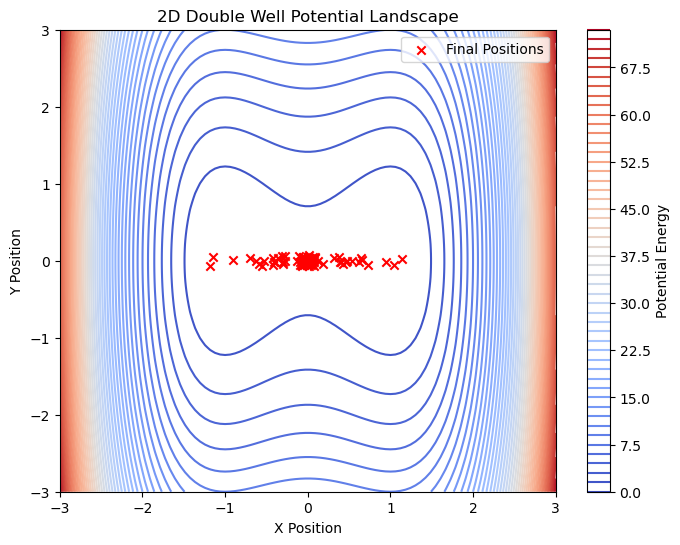

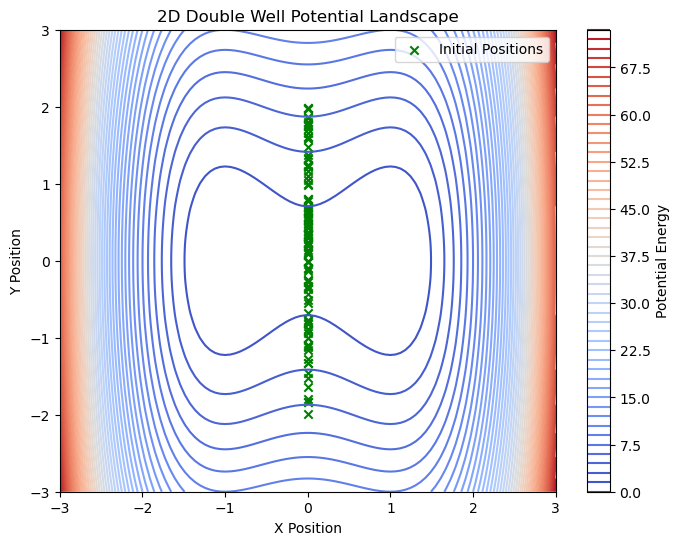

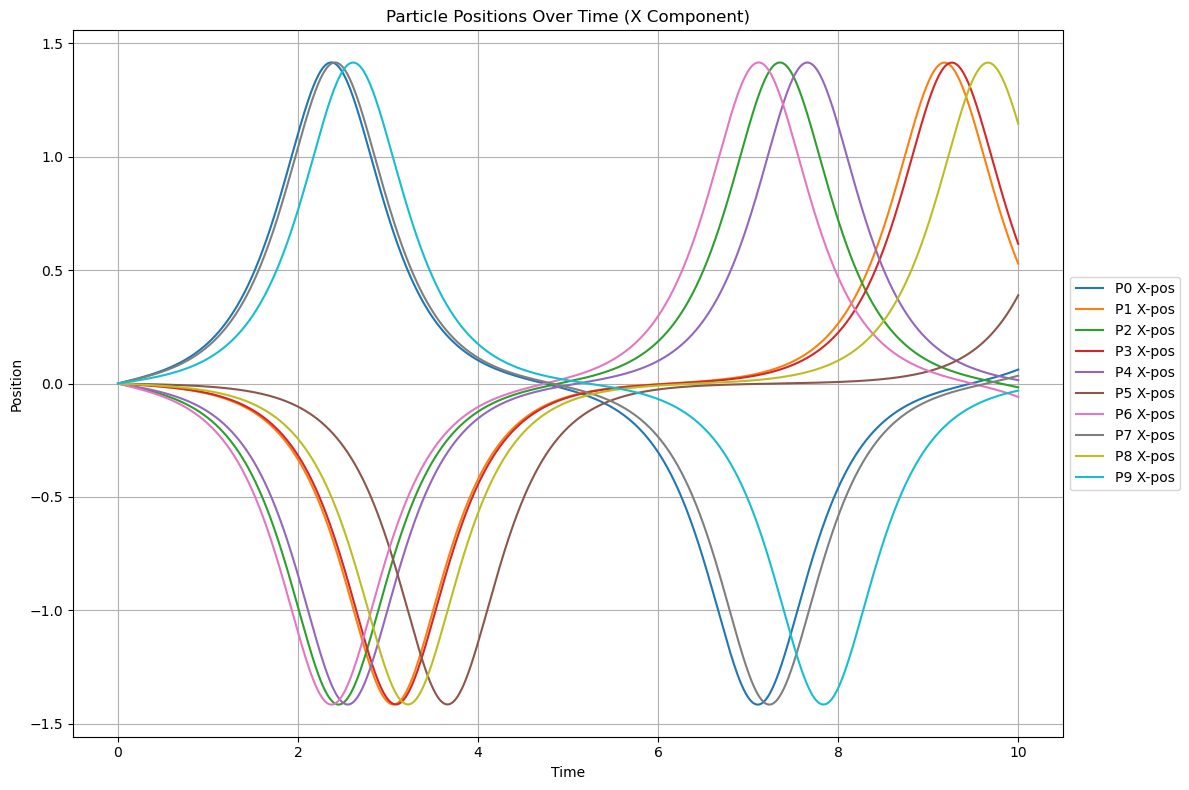

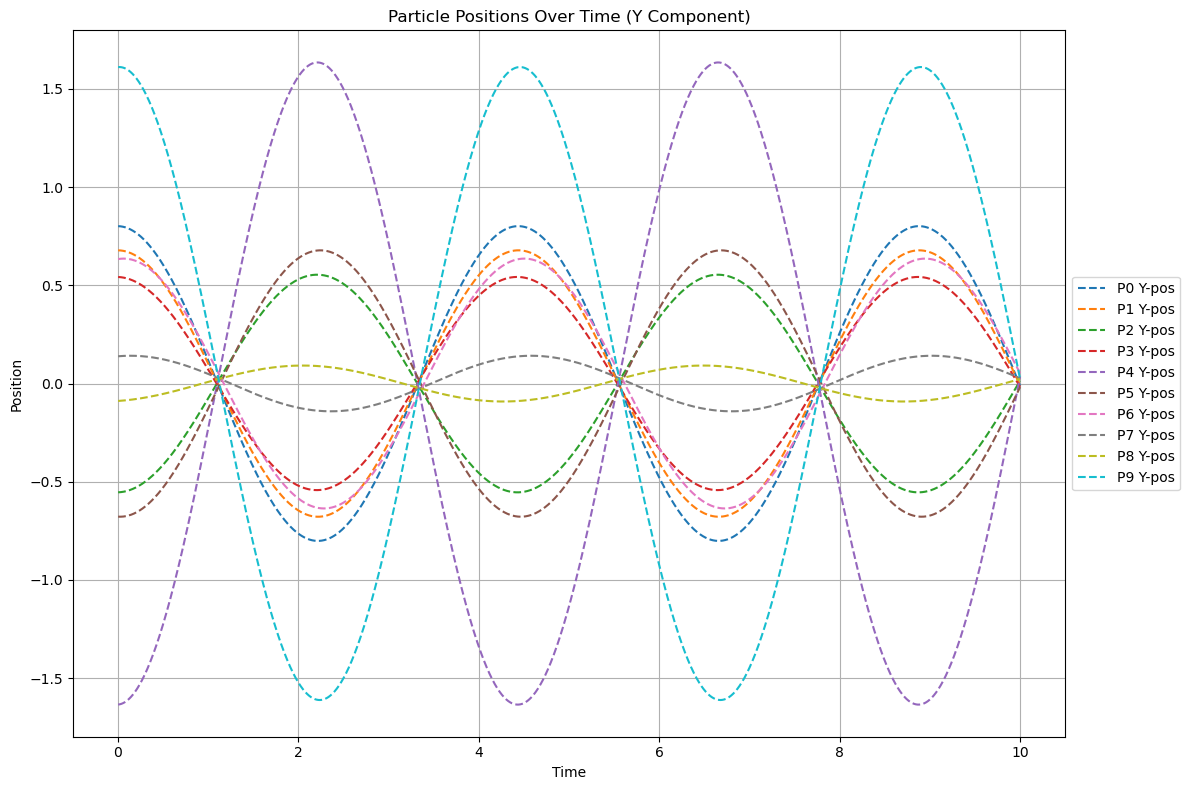

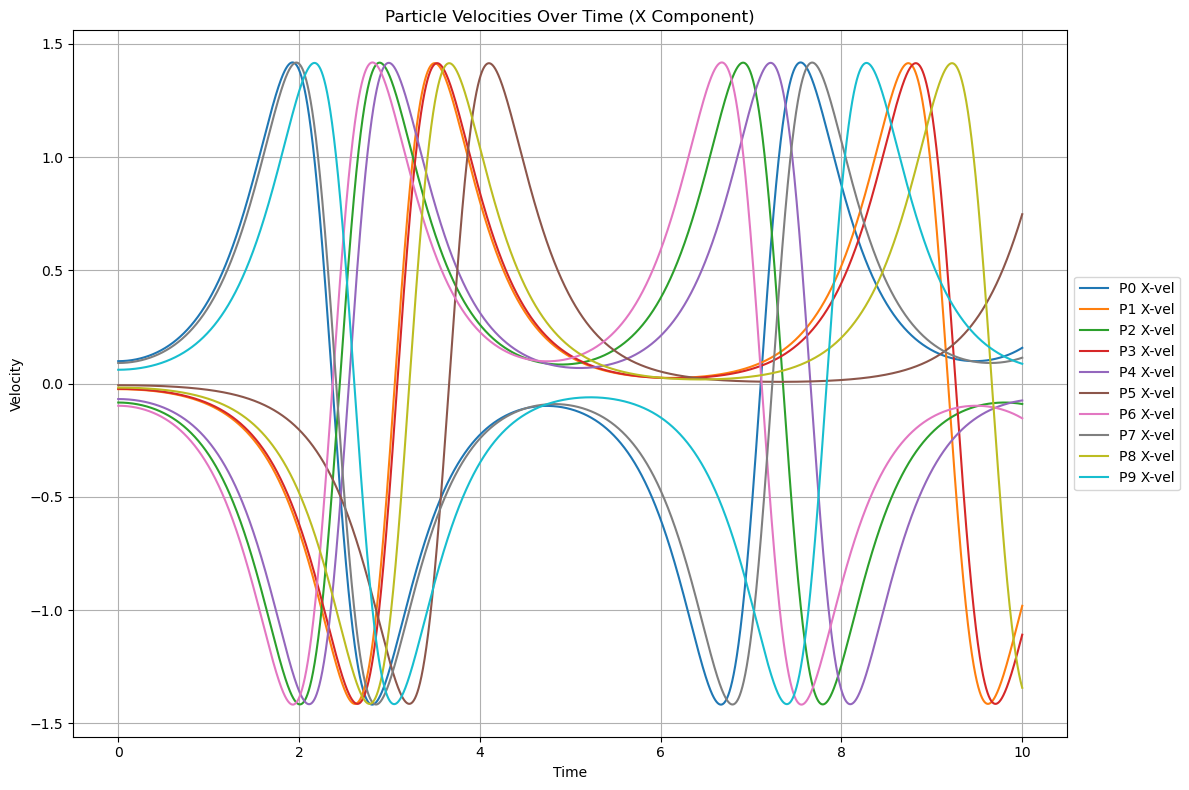

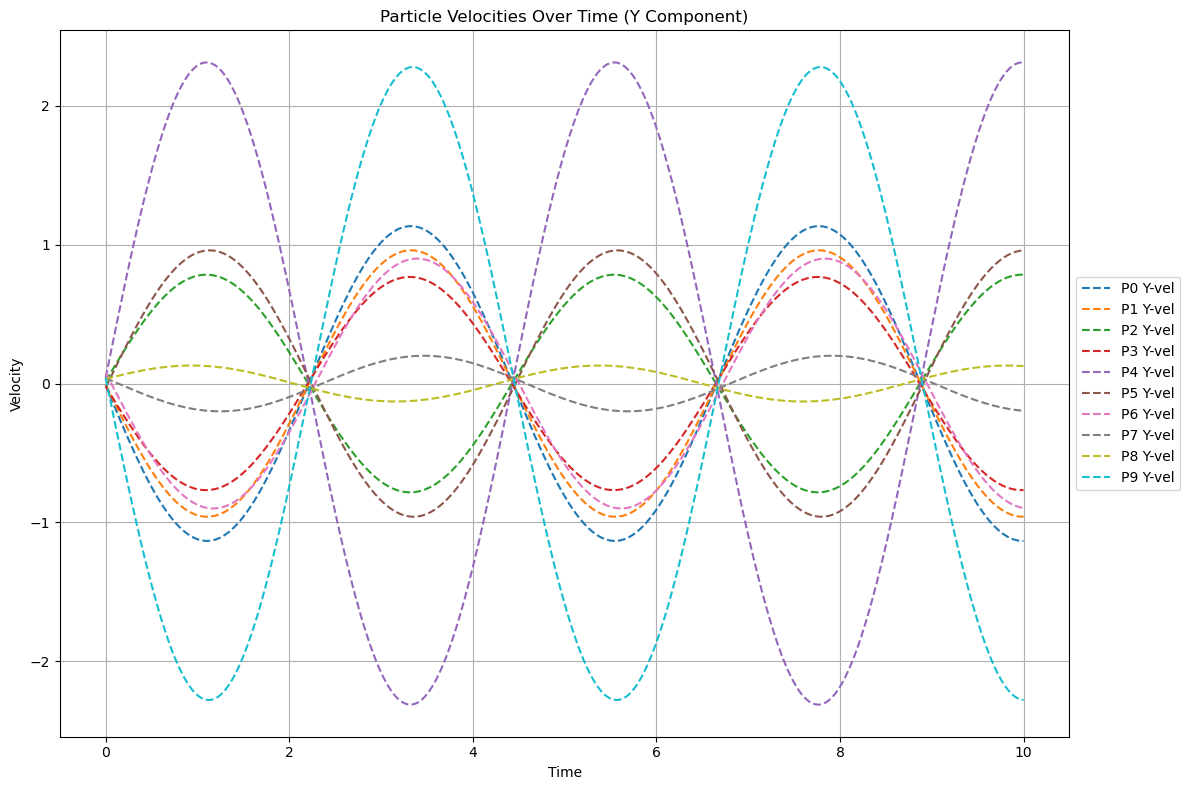

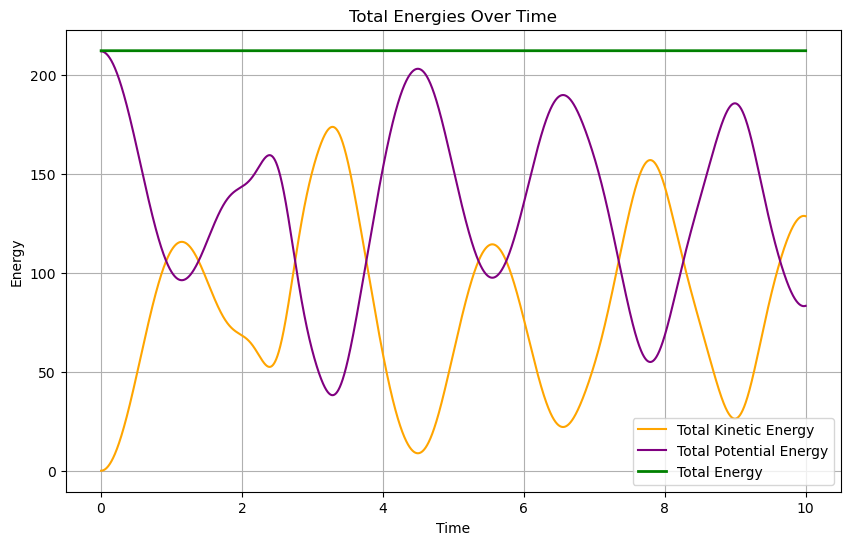

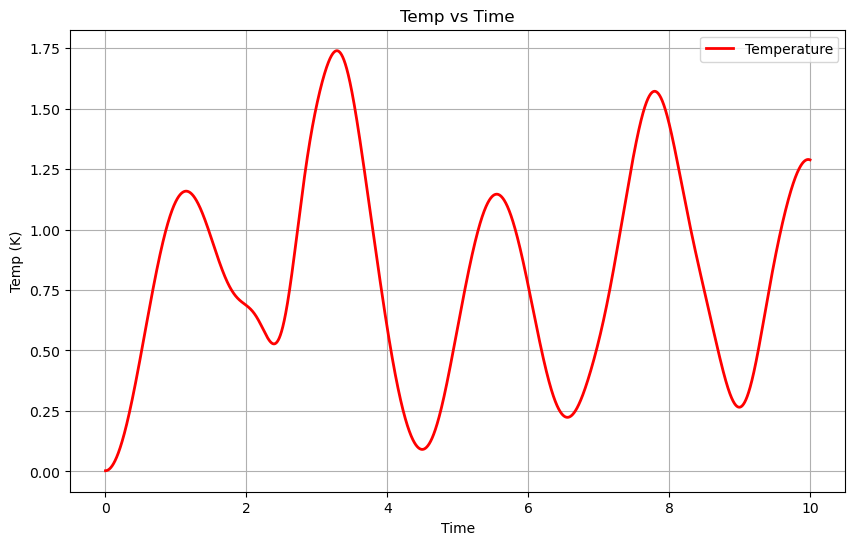

In [50]:
# plotting
final_x = [pos[0] for pos in all_positions[-1]]
final_y = [pos[1] for pos in all_positions[-1]]
initial_x = [pos[0] for pos in all_positions[0]]
initial_y = [pos[1] for pos in all_positions[0]]
X_grid, Y_grid = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z_potential =  (X_grid**2 - 1)**2 + Y_grid**2

# final positions
plt.figure(figsize=(8, 6))
plt.contour(X_grid, Y_grid, Z_potential, levels=50, cmap='coolwarm')
plt.colorbar(label='Potential Energy')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Double Well Potential Landscape')
plt.scatter(final_x, final_y, color='red', marker='x', label='Final Positions') # Overlay final positions
plt.legend()
plt.show()

# initial positions
plt.figure(figsize=(8, 6))
plt.contour(X_grid, Y_grid, Z_potential, levels=50, cmap='coolwarm')
plt.colorbar(label='Potential Energy')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Double Well Potential Landscape')
plt.scatter(initial_x, initial_y, color='green', marker='x', label='Initial Positions') 
plt.legend()
plt.show()

particles_to_plot_trajectories = min(10, N) # Plot up to 5 particles for clarity

# position (x) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_x'], label=f'P{i} X-pos', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Particle Positions Over Time (X Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# position (y) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_y'], label=f'P{i} Y-pos', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Particle Positions Over Time (Y Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# velocity (x) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_vx'], label=f'P{i} X-vel', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Particle Velocities Over Time (X Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# velocity (y) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_vy'], label=f'P{i} Y-vel', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Particle Velocities Over Time (Y Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# Energy
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['KE'], label='Total Kinetic Energy', color='orange')
plt.plot(df['time'], df['PE'], label='Total Potential Energy', color='purple')
plt.plot(df['time'], df['TE'], label='Total Energy', color='green', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Total Energies Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Temperature
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Temp'], label='Temperature', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Temp (K)')
plt.title('Temp vs Time')
plt.legend()
plt.grid(True)
plt.show()

Step: 0, Time: 0.00
Step: 1000, Time: 1.00
Step: 2000, Time: 2.00
Step: 3000, Time: 3.00
Step: 4000, Time: 4.00
Step: 5000, Time: 5.00
Step: 6000, Time: 6.00
Step: 7000, Time: 7.00
Step: 8000, Time: 8.00
Step: 9000, Time: 9.00
Step: 9999, Time: 10.00
Simulation finished.


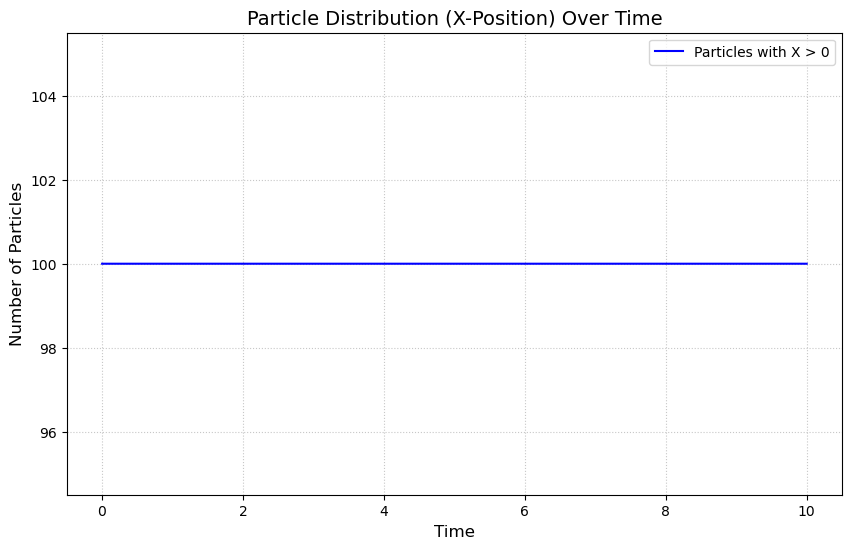

In [78]:
# written from scratch
# ver 2.2
# Using a 2D potential U(x,y) = (x^2-1)^2 + y^2
# + counter of number of particles in each frame with x > 0 and x < 0

import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --initialisation--

# 1) system set up
N = 100 # no. of particles
init_pos = [[random.uniform(0.65, 1.35), random.uniform(-2.0, 2.0)]  for i in range(N)] # initial positions {x,y}
init_vel = [[random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)] for i in range(N)] # initial velocities {vx, vy}
masses = [1.0 for i in range(N)] # masses of each of the particles

# 2) defining forcefield 
# function to calculate force
# partial derivatives to calculate Fx and Fy
# Fx = -dU/dx , Fy = -dU/dy ; U(x,y) = (x^2-1)^2 + y^2
def calc_force(position_2D): # In the format [x,y]
    Fx = -4 * position_2D[0] * (position_2D[0]**2 - 1) 
    Fy = -2 * position_2D[1]
    return [Fx, Fy] # Outputs in a vector form as a list

# 3) simlulation parameters
n_steps = 10000
dt = 0.001 # time step

# --simulation--
time = 0.0
positions = list(init_pos)
velocities = list(init_vel)
velocities_half = []

# lists to save trajectory data
all_times = []
all_positions = []
all_velocities = []
all_KE = []
all_PE = []
all_TE = []
all_temperature = []

# Lists to store counts based on x position
all_pos_x_pos_count = []     # Count of particles with x > 0
all_neg_x_pos_count = []     # Count of particles with x < 0

# main loop: integrator (3 step velocity verlet)
for step in range(n_steps):
    
    # calculating forces at the beginning of the loop
    forces = [calc_force(positions[i]) for i in range(N)] 
    
    # calculating x and y components of velocities at dt/2 according to these forces 
    velocities_half_temp = []
    positions_temp = []

    for i in range(N):
        velocities_x_half = velocities[i][0] + 0.5*dt *forces[i][0]/masses[i]  
        velocities_y_half = velocities[i][1] + 0.5*dt *forces[i][1]/masses[i]  
        velocities_half_temp.append([velocities_x_half, velocities_y_half])
        
    # calculating positions at dt
        positions_x = positions[i][0] + dt*velocities_x_half
        positions_y = positions[i][1] + dt*velocities_y_half
        positions_temp.append([positions_x, positions_y])
    positions = positions_temp
        
    # recaclculating forces for new positions (dt)
    forces = [calc_force(positions[i]) for i in range(N)]

    # Initialize counts for the current frame
    current_pos_x_pos_count = 0
    current_neg_x_pos_count = 0
    
    # calculating velocities at dt according to the new forces
    velocities_temp = []
    for i in range(N):
        velocities_x = velocities_half_temp[i][0] + 0.5*dt *forces[i][0]/masses[i] 
        velocities_y = velocities_half_temp[i][1] + 0.5*dt *forces[i][1]/masses[i] 
        velocities_temp.append([velocities_x, velocities_y])
        
        # Check x position
        if positions[i][0] > 0: 
            current_pos_x_pos_count += 1
        elif positions[i][0] < 0: 
            current_neg_x_pos_count += 1
    velocities = velocities_temp
        
    # calculating PE, KE, and TE
    KE = sum(0.5 * masses[i] * (velocities[i][0]**2 + velocities[i][1]**2) for i in range(N))
    PE = sum(((positions[i][0]**2 - 1)**2 + positions[i][1]**2) for i in range(N))
    TE = KE + PE

    # calculate temperature: using equipartition theorem
    # T = KE/kB with units: Eref/kB
    kB = 1.0 # "Reduced" kB 
    temperature = KE/(N*kB)
    
    time += dt

    # saving the positions and velocities 
    all_times.append(time)
    all_positions.append(positions)
    all_velocities.append(velocities)
    all_PE.append(PE)
    all_KE.append(KE)
    all_TE.append(TE)
    all_temperature.append(temperature)

    # Store the counts for this frame based on X-POSITION
    all_pos_x_pos_count.append(current_pos_x_pos_count)
    all_neg_x_pos_count.append(current_neg_x_pos_count)


    if step%(n_steps/10) == 0 or step == n_steps-1: # terminal output once every 100 steps
        print(f"Step: {step}, Time: {time:.2f}")

print("Simulation finished.")

# --data storage--
data = {'time': all_times}

for i in range(N):
    data[f'particle_{i}_x'] = [x[i][0] for x in all_positions]
    data[f'particle_{i}_y'] = [y[i][1] for y in all_positions]    
    data[f'particle_{i}_vx'] = [vx[i][0] for vx in all_velocities]
    data[f'particle_{i}_vy'] = [vy[i][1] for vy in all_velocities]

# Create a df
df = pd.DataFrame(data)
df['PE'] = all_PE
df['KE'] = all_KE
df['TE'] = all_TE
df['Temp'] = all_temperature
df['Particles_X_Pos_Count'] = all_pos_x_pos_count
df['Particles_X_Neg_Count'] = all_neg_x_pos_count

# output CSV
#df.to_csv('md_out.csv', index=False)
#print(f'Output CSV file: md_out.csv')

# --- Plot: Particles with +X and -X Positions over Time ---
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Particles_X_Pos_Count'], label='Particles with X > 0', color='blue')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Particles', fontsize=12)
plt.title('Particle Distribution (X-Position) Over Time', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

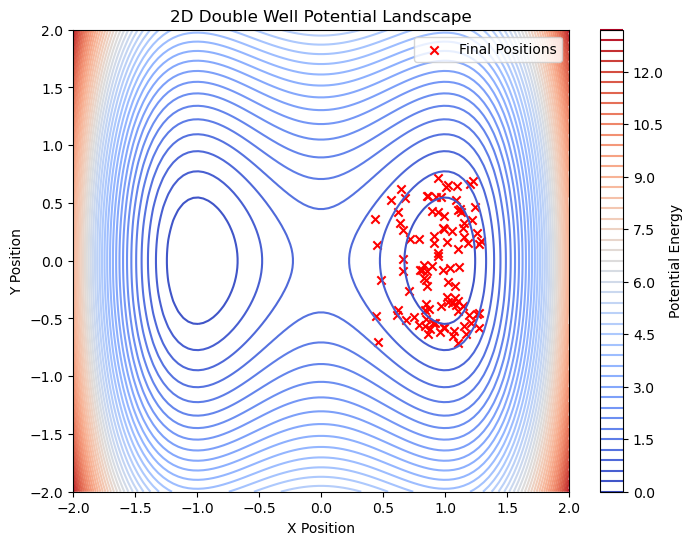

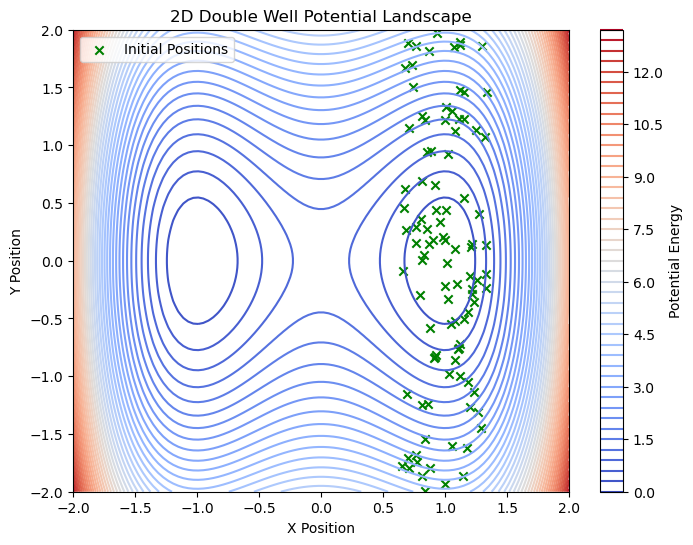

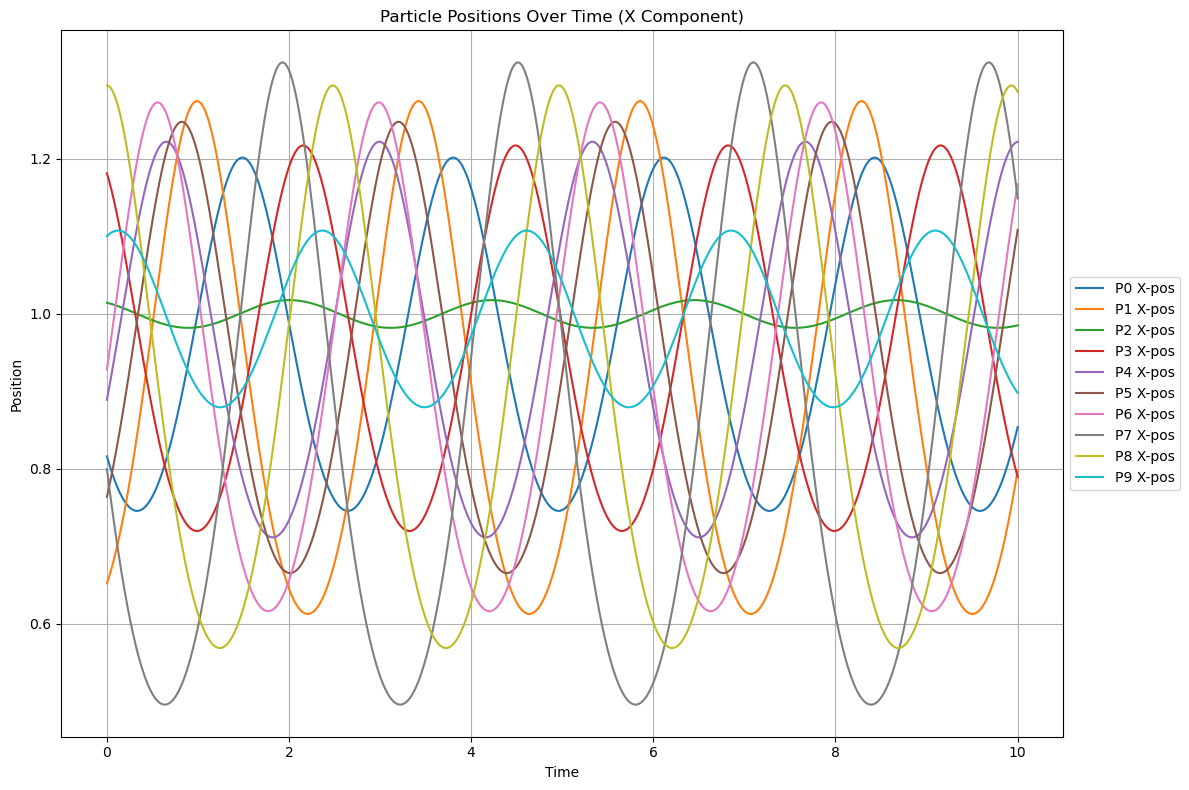

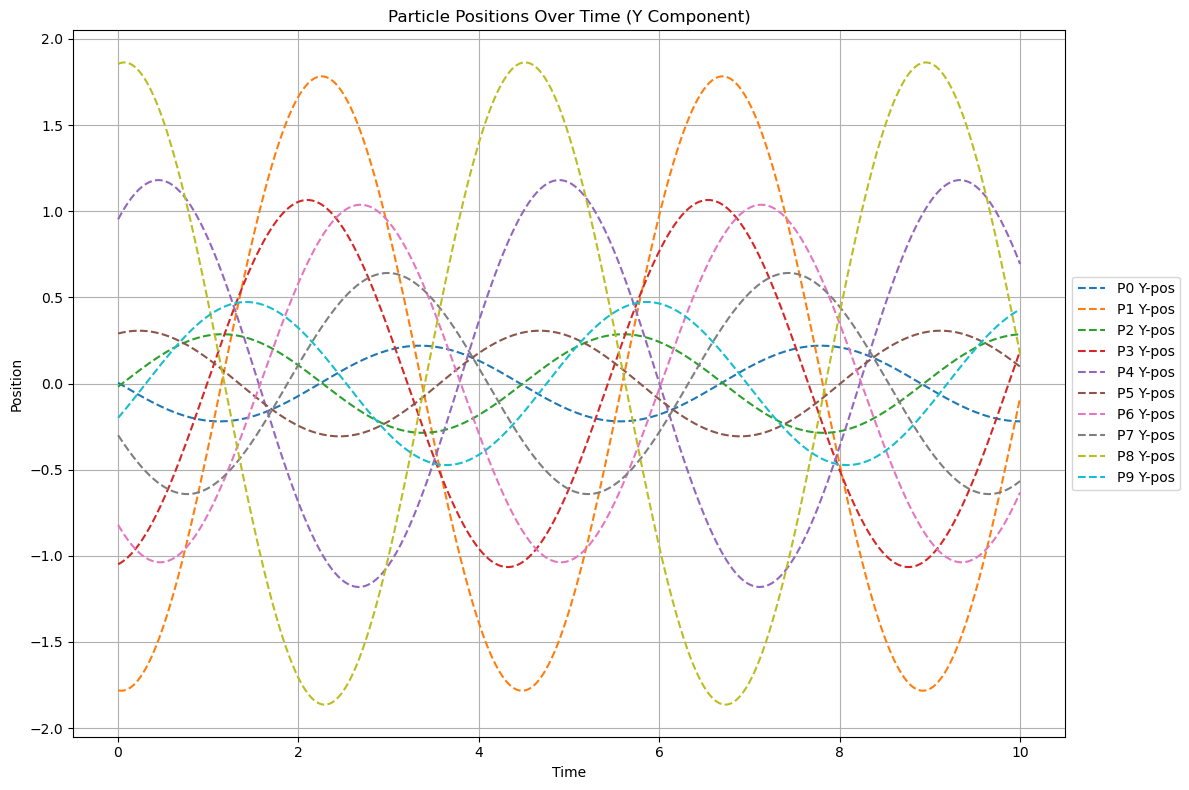

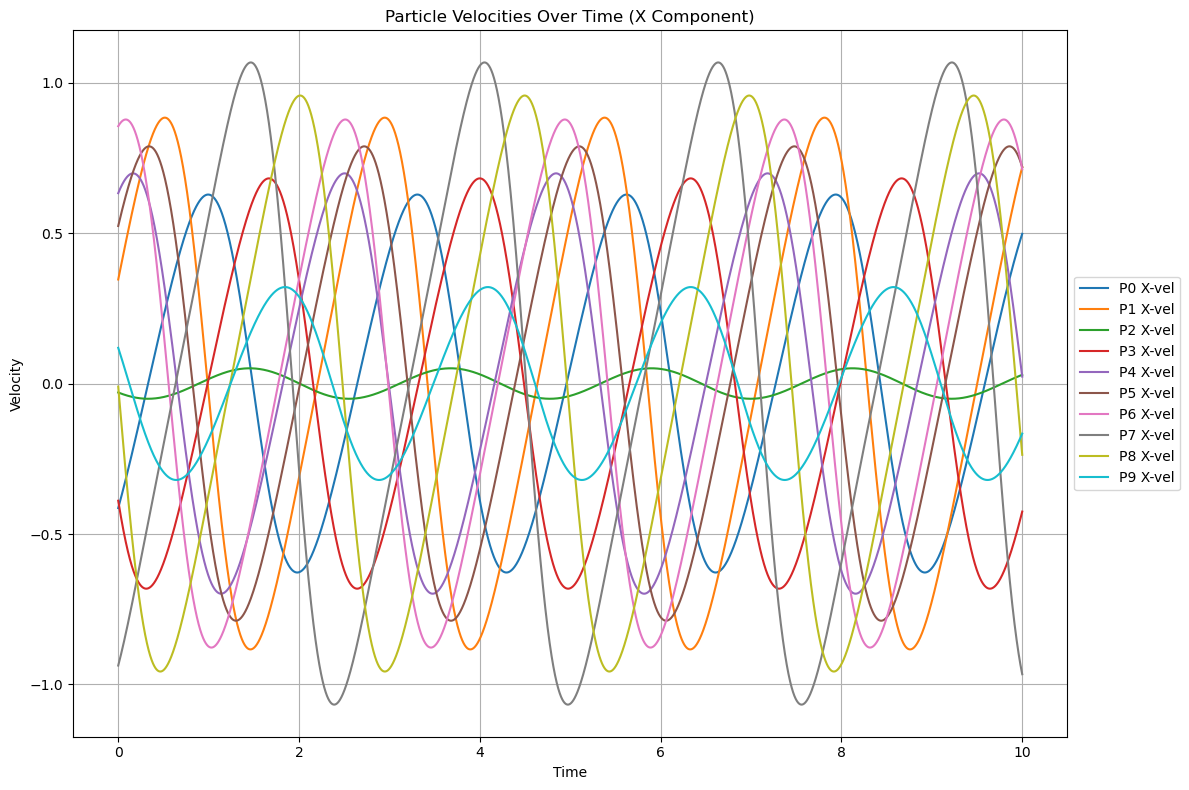

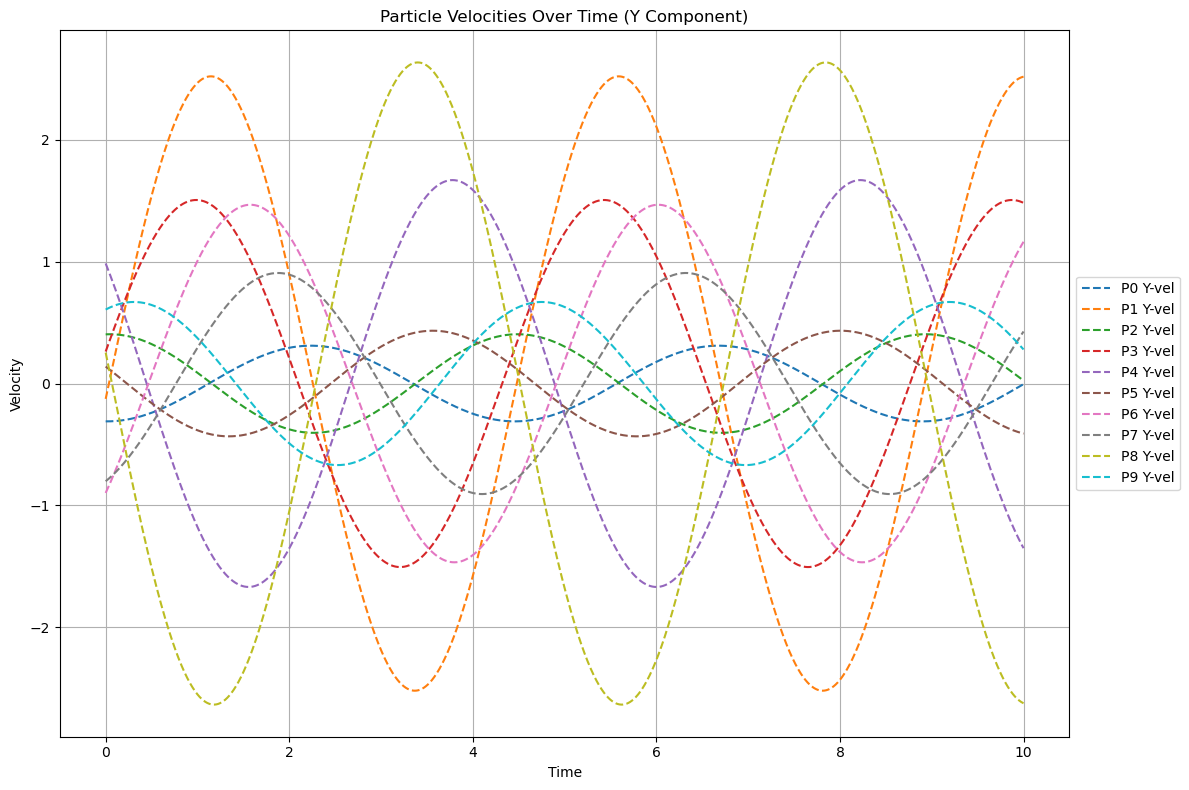

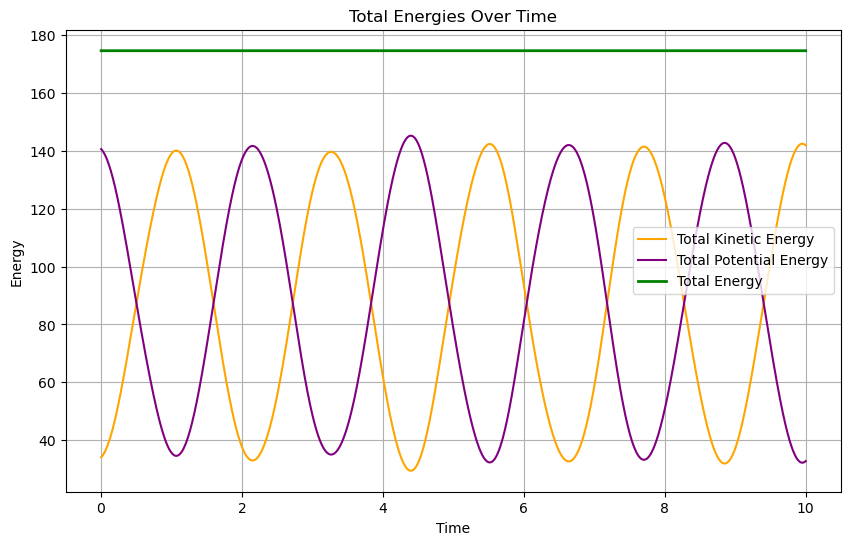

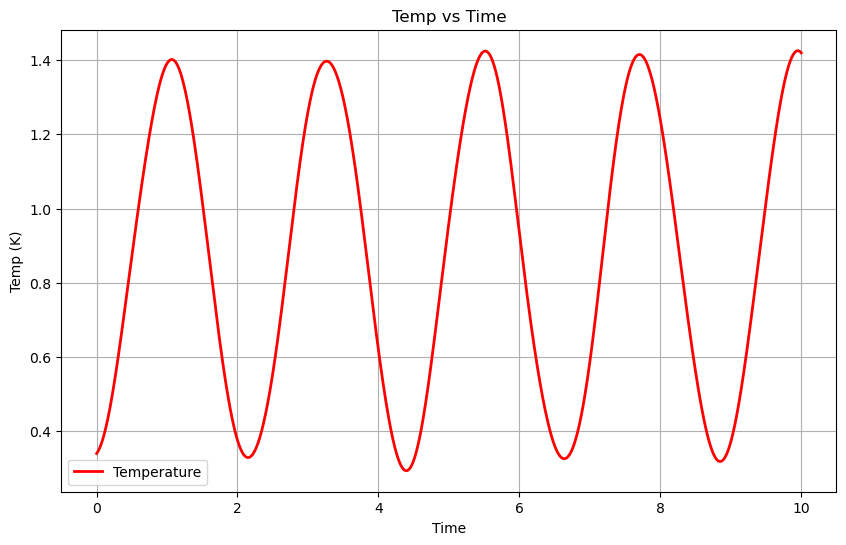

In [79]:
# plotting
final_x = [pos[0] for pos in all_positions[-1]]
final_y = [pos[1] for pos in all_positions[-1]]
initial_x = [pos[0] for pos in all_positions[0]]
initial_y = [pos[1] for pos in all_positions[0]]
X_grid, Y_grid = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
Z_potential =  (X_grid**2 - 1)**2 + Y_grid**2

# final positions
plt.figure(figsize=(8, 6))
plt.contour(X_grid, Y_grid, Z_potential, levels=50, cmap='coolwarm')
plt.colorbar(label='Potential Energy')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Double Well Potential Landscape')
plt.scatter(final_x, final_y, color='red', marker='x', label='Final Positions') # Overlay final positions
plt.legend()
plt.show()

# initial positions
plt.figure(figsize=(8, 6))
plt.contour(X_grid, Y_grid, Z_potential, levels=50, cmap='coolwarm')
plt.colorbar(label='Potential Energy')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Double Well Potential Landscape')
plt.scatter(initial_x, initial_y, color='green', marker='x', label='Initial Positions') 
plt.legend()
plt.show()

particles_to_plot_trajectories = min(10, N) # Plot up to 5 particles for clarity

# position (x) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_x'], label=f'P{i} X-pos', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Particle Positions Over Time (X Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# position (y) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_y'], label=f'P{i} Y-pos', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Particle Positions Over Time (Y Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# velocity (x) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_vx'], label=f'P{i} X-vel', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Particle Velocities Over Time (X Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# velocity (y) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_vy'], label=f'P{i} Y-vel', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Particle Velocities Over Time (Y Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# Energy
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['KE'], label='Total Kinetic Energy', color='orange')
plt.plot(df['time'], df['PE'], label='Total Potential Energy', color='purple')
plt.plot(df['time'], df['TE'], label='Total Energy', color='green', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Total Energies Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Temperature
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Temp'], label='Temperature', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Temp (K)')
plt.title('Temp vs Time')
plt.legend()
plt.grid(True)
plt.show()

Total simulation steps: 10000
Rendering 1000 frames (skipping every 10 steps)
Saving animation to particle_dynamics_fast.mp4...
Animation saved successfully!


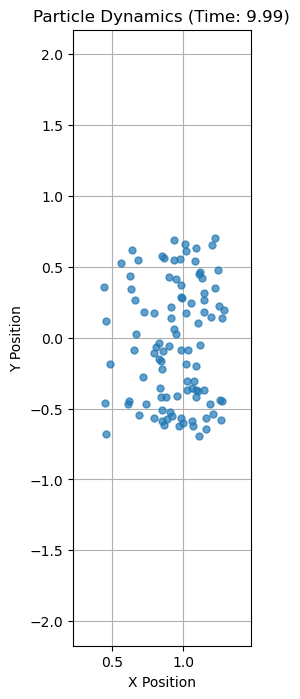

In [80]:
# feature to animate trajectory

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np

# Assuming 'df' DataFrame is already created from your simulation results
# N (number of particles) is also assumed to be defined.

# --- Prepare Data for Faster Access ---
# Convert relevant columns to NumPy arrays once for faster slicing in animate()
# This creates a list of NumPy arrays, where each array is (num_frames, 2) for x,y
# or (num_frames,) for individual particle components
particle_x_data = [df[f'particle_{i}_x'].values for i in range(N)]
particle_y_data = [df[f'particle_{i}_y'].values for i in range(N)]
time_data_np = df['time'].values # Convert time column to NumPy array

# --- Video Generation Setup ---

# 1. Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Determine robust plot limits from the entire dataset
x_min = df.filter(like='particle_').filter(like='_x').values.min() - 0.1
x_max = df.filter(like='particle_').filter(like='_x').values.max() + 0.1
y_min = df.filter(like='particle_').filter(like='_y').values.min() - 0.1
y_max = df.filter(like='particle_').filter(like='_y').values.max() + 0.1

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_aspect('equal', adjustable='box')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_title('Particle Dynamics (Time: 0.00)')
ax.grid(True)

# 2. Create an initial scatter plot
line, = ax.plot([], [], 'o', markersize=5, alpha=0.7) # `line` is an iterable, so unpack it

# --- Optimization Parameters ---
# Adjust these values to control video speed and generation time
frame_skip = 10  # Process every 10th frame. Higher value = faster generation, fewer frames
interval_ms = 50 # Milliseconds between frames in the *animation object*. Lower = faster playback
dpi = 150        # Dots per inch for output video. Lower = smaller file, faster render, lower quality

# 3. Define the animation update function
def animate(frame_idx):
    # Map the animated frame index to the actual data index
    actual_data_idx = frame_idx * frame_skip

    # Get positions for the current frame directly from NumPy arrays
    current_x_positions = [particle_x_data[i][actual_data_idx] for i in range(N)]
    current_y_positions = [particle_y_data[i][actual_data_idx] for i in range(N)]

    # Update the data for the scatter plot
    line.set_data(current_x_positions, current_y_positions)

    # Update the title to show the current time
    current_time = time_data_np[actual_data_idx]
    ax.set_title(f'Particle Dynamics (Time: {current_time:.2f})')
    
    return line, # Return the updated artist

# 4. Create the animation
total_frames_to_render = len(df) // frame_skip
if len(df) % frame_skip != 0: # Include the last frame if skipping doesn't land exactly on it
    total_frames_to_render += 1

print(f"Total simulation steps: {len(df)}")
print(f"Rendering {total_frames_to_render} frames (skipping every {frame_skip} steps)")

ani = animation.FuncAnimation(fig, animate, 
                              frames=total_frames_to_render, 
                              interval=interval_ms, 
                              blit=True)

# 5. Save the animation
# fps = 1000 / interval_ms
output_video_path = 'particle_dynamics_fast.mp4'
try:
    print(f"Saving animation to {output_video_path}...")
    ani.save(output_video_path, writer='ffmpeg', fps=1000/interval_ms, dpi=dpi)
    print("Animation saved successfully!")
except ValueError as e:
    print(f"Error saving animation: {e}")
    print("This often means FFmpeg is not found or not correctly configured.")
    print("Please ensure FFmpeg is installed and its executable is in your system's PATH.")
    print("You can usually check by typing 'ffmpeg -version' in your terminal/command prompt.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# If you want to display the animation in a Jupyter Notebook/IPython, uncomment this:
# from IPython.display import HTML
# HTML(ani.to_jshtml())

In [59]:
# written from scratch
# ver 2.4
# Using a 2D potential U(x,y) = (x^2-1)^2 + y^2
# + committor function

import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --initialisation--

# 1) system set up
N = 1000 # no. of particles
init_pos = [[1.0,0]  for i in range(N)] # initial positions {x,y}
init_vel = [[random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)] for i in range(N)] # initial velocities {vx, vy}
masses = [1.0 for i in range(N)] # masses of each of the particles
box_size = 4.0

# PBC: 
def pbc(pos, box_size):
    x, y = pos[0], pos[1]
    half_box = box_size / 2.0

    # For x-coordinate
    if x > half_box:
        x -= box_size
    elif x < -half_box:
        x += box_size

    # For y-coordinate
    if y > half_box:
        y -= box_size
    elif y < -half_box:
        y += box_size
    
    return [x, y]

# 2) defining forcefield 
# function to calculate force
# partial derivatives to calculate Fx and Fy
# Fx = -dU/dx , Fy = -dU/dy ; U(x,y) = (x^2-1)^2 + y^2
def calc_force(position_2D): # In the format [x,y]
    Fx = -4 * position_2D[0] * (position_2D[0]**2 - 1) 
    Fy = -2 * position_2D[1]
    return [Fx, Fy] # Outputs in a vector form as a list

# 3) simlulation parameters
n_steps = 1000 # time only until initial fall into basins
dt = 0.001 # time step

# --simulation--
time = 0.0
positions = list(init_pos)
velocities = list(init_vel)
velocities_half = []

# lists to save trajectory data
all_times = []
all_positions = []
all_velocities = []
all_KE = []
all_PE = []
all_TE = []
all_temperature = []

# Lists to store counts based on x position
all_pos_x_pos_count = []     # Count of particles with x > 0
all_neg_x_pos_count = []     # Count of particles with x < 0

# main loop: integrator (3 step velocity verlet)
for step in range(n_steps):
    
    # calculating forces at the beginning of the loop
    forces = [calc_force(positions[i]) for i in range(N)] 
    
    # calculating x and y components of velocities at dt/2 according to these forces 
    velocities_half_temp = []
    positions_temp = []

    for i in range(N):
        velocities_x_half = velocities[i][0] + 0.5*dt *forces[i][0]/masses[i]  
        velocities_y_half = velocities[i][1] + 0.5*dt *forces[i][1]/masses[i]  
        velocities_half_temp.append([velocities_x_half, velocities_y_half])
        
    # calculating positions at dt
        positions_x = positions[i][0] + dt*velocities_x_half
        positions_y = positions[i][1] + dt*velocities_y_half

        #PBC:
        wrapped_pos = pbc([positions_x, positions_y], box_size)
        positions_temp.append(wrapped_pos)
        
    positions = positions_temp
        
    # recaclculating forces for new positions (dt)
    forces = [calc_force(positions[i]) for i in range(N)]

    # Initialize counts for the current frame
    current_pos_x_pos_count = 0
    current_neg_x_pos_count = 0
    
    # calculating velocities at dt according to the new forces
    velocities_temp = []
    for i in range(N):
        velocities_x = velocities_half_temp[i][0] + 0.5*dt *forces[i][0]/masses[i] 
        velocities_y = velocities_half_temp[i][1] + 0.5*dt *forces[i][1]/masses[i] 
        velocities_temp.append([velocities_x, velocities_y])
        
        # Check x position
        if positions[i][0] > 0: 
            current_pos_x_pos_count += 1
        elif positions[i][0] < 0: 
            current_neg_x_pos_count += 1
    velocities = velocities_temp
        
    # calculating PE, KE, and TE
    KE = sum(0.5 * masses[i] * (velocities[i][0]**2 + velocities[i][1]**2) for i in range(N))
    PE = sum(((positions[i][0]**2 - 1)**2 + positions[i][1]**2) for i in range(N))
    TE = KE + PE

    # calculate temperature: using equipartition theorem
    # T = KE/kB with units: Eref/kB
    kB = 1.0 # "Reduced" kB 
    temperature = KE/(N*kB)
    
    time += dt

    # saving the positions and velocities 
    all_times.append(time)
    all_positions.append(positions)
    all_velocities.append(velocities)
    all_PE.append(PE)
    all_KE.append(KE)
    all_TE.append(TE)
    all_temperature.append(temperature)

    # Store the counts for this frame based on X-POSITION
    all_pos_x_pos_count.append(current_pos_x_pos_count)
    all_neg_x_pos_count.append(current_neg_x_pos_count)


    if step%(n_steps/10) == 0 or step == n_steps-1: # terminal output once every 100 steps
        print(f"Step: {step}, Time: {time:.2f}")

print("Simulation finished.")

# --data storage--
data = {'time': all_times}

for i in range(N):
    data[f'particle_{i}_x'] = [x[i][0] for x in all_positions]
    data[f'particle_{i}_y'] = [y[i][1] for y in all_positions]    
    data[f'particle_{i}_vx'] = [vx[i][0] for vx in all_velocities]
    data[f'particle_{i}_vy'] = [vy[i][1] for vy in all_velocities]

# Create a df
df = pd.DataFrame(data)
df['PE'] = all_PE
df['KE'] = all_KE
df['TE'] = all_TE
df['Temp'] = all_temperature
df['Particles_X_Pos_Count'] = all_pos_x_pos_count
df['Particles_X_Neg_Count'] = all_neg_x_pos_count

# output CSV
#df.to_csv('md_out.csv', index=False)
#print(f'Output CSV file: md_out.csv')

# committor: pB = no. of particles ending in B / N
def calc_committor(df, N):
    final_pos_B = 0
    final_pos_A = 0
    for i in range(N): 
        if (df[f'particle_{i}_x'].iloc[-1]).item() > 0: 
            final_pos_B += 1 
        elif (df[f'particle_{i}_x'].iloc[-1]).item() < 0: 
            final_pos_A += 1
    return final_pos_B/N

# displaying committor results
pB = calc_committor(df, N)
print(f'Committor pB = {pB}')
stdev_pB = math.sqrt((pB*(1.0 - pB))/N) # Standard deviation
print(f'Standard deviation of pB (σ) = {stdev_pB}')

#print(df[f'particle_1_x'][N-1])

Step: 0, Time: 0.00
Step: 100, Time: 0.10
Step: 200, Time: 0.20
Step: 300, Time: 0.30
Step: 400, Time: 0.40
Step: 500, Time: 0.50
Step: 600, Time: 0.60
Step: 700, Time: 0.70
Step: 800, Time: 0.80
Step: 900, Time: 0.90
Step: 999, Time: 1.00
Simulation finished.
Committor pB = 1.0
Standard deviation of pB (σ) = 0.0


In [31]:
stdev_pB = math.sqrt((pB*(1.0 - pB))/N)
print(f'Standard deviation of pB (σ) = {stdev_pB}')


Standard deviation of pB (σ) = 0.049749371855330994


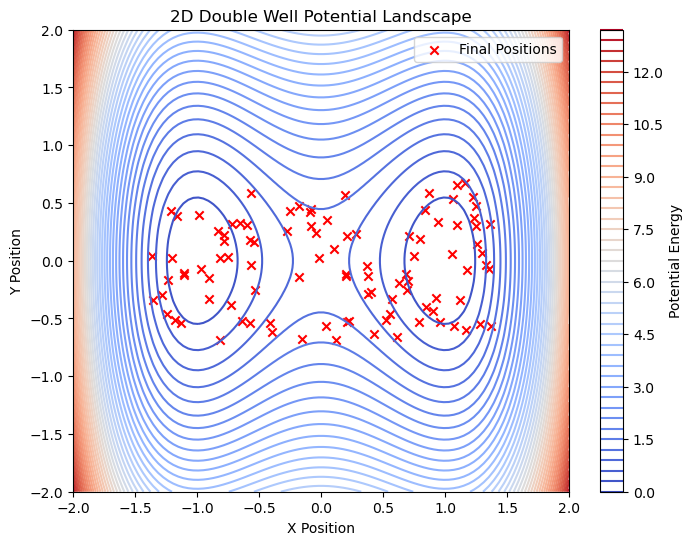

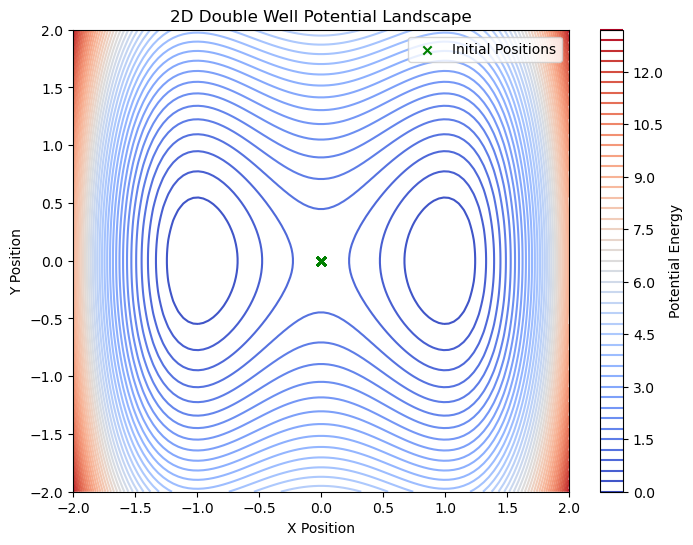

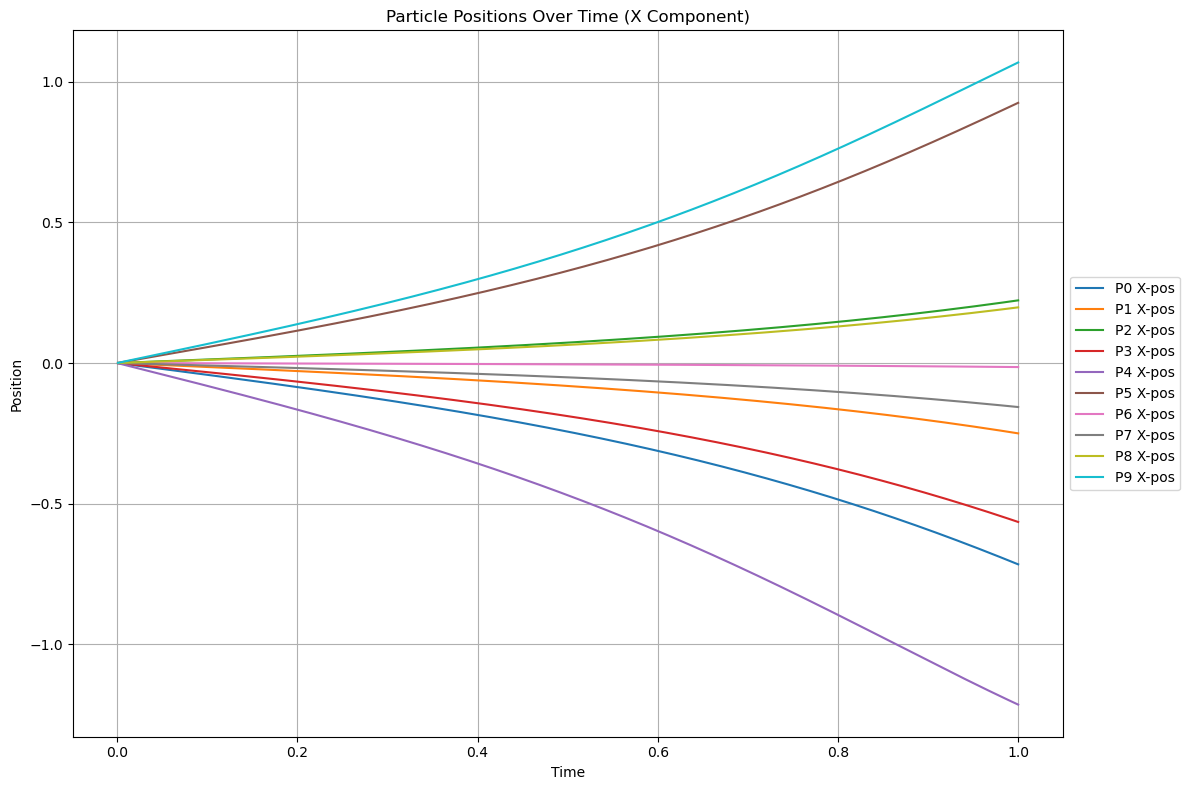

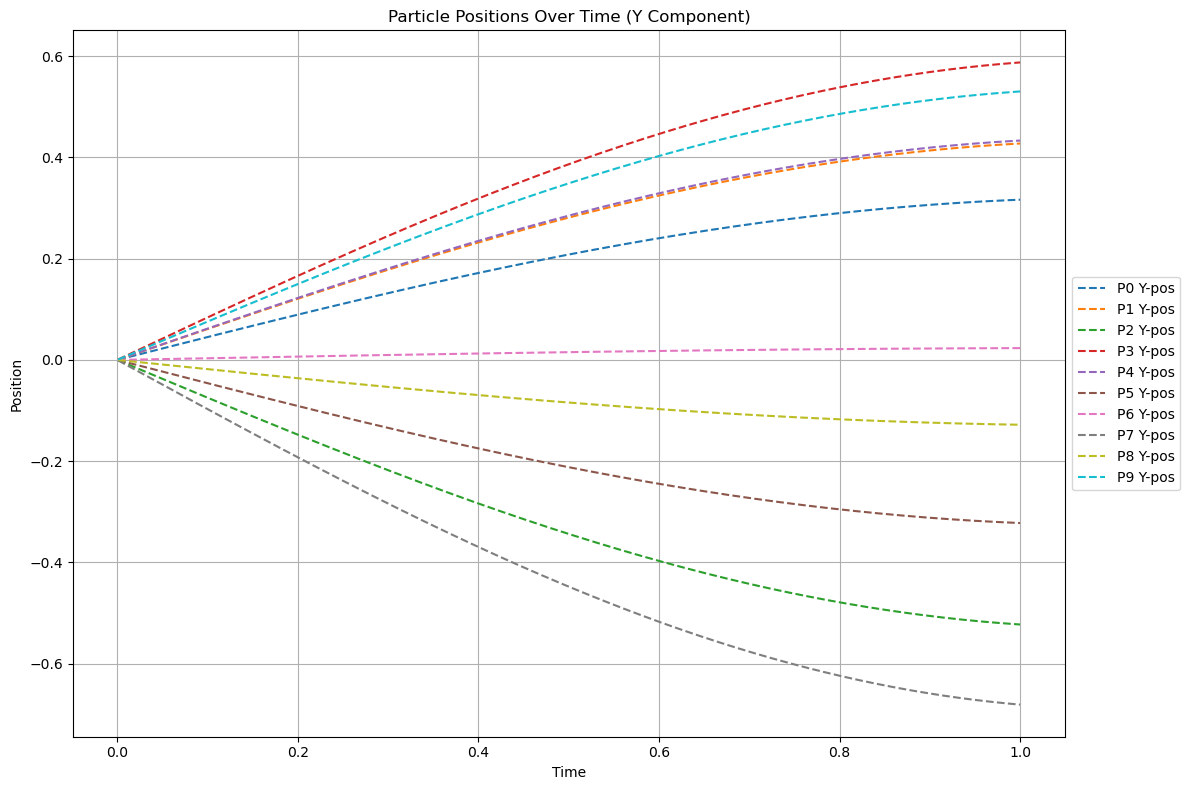

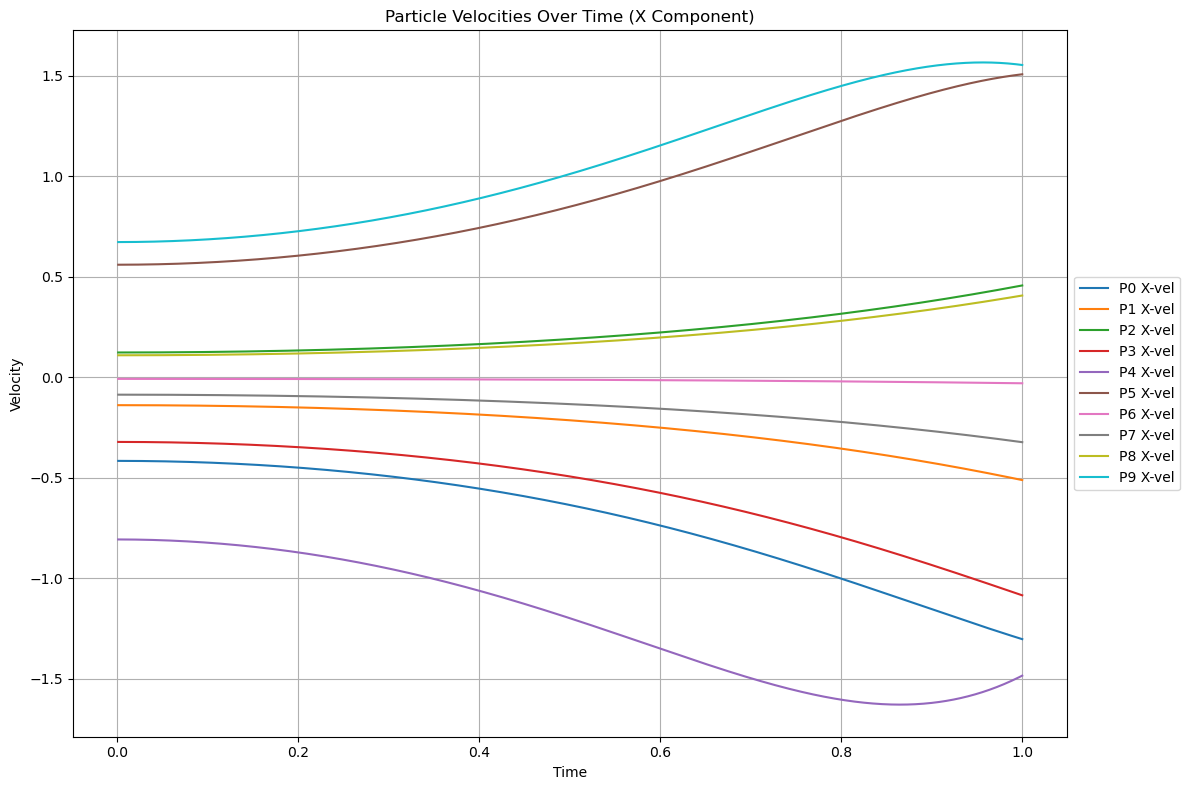

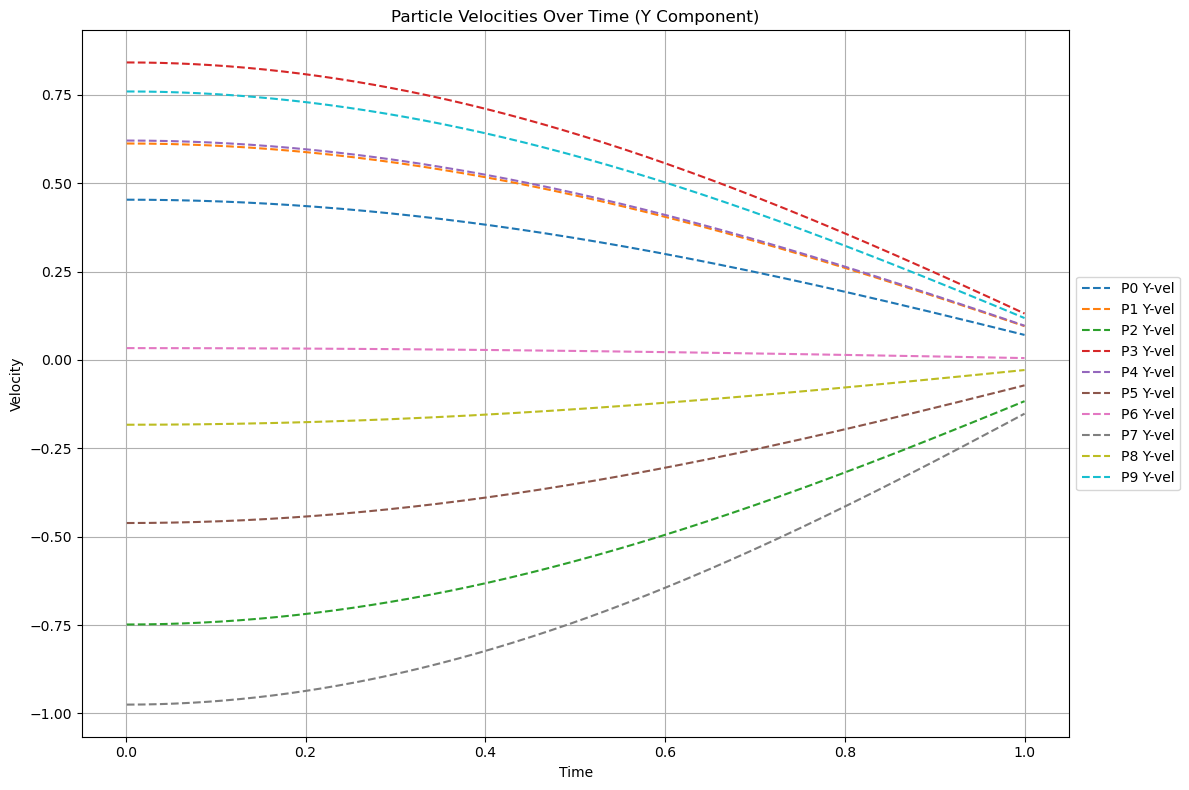

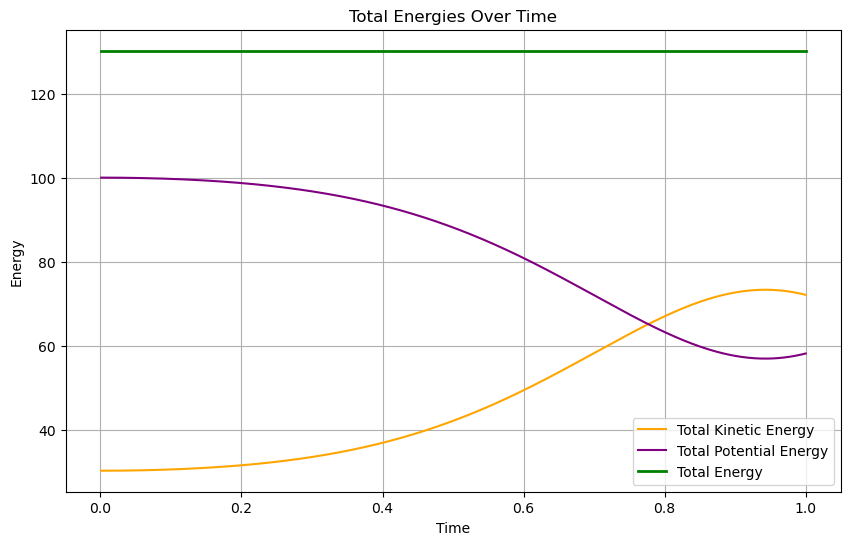

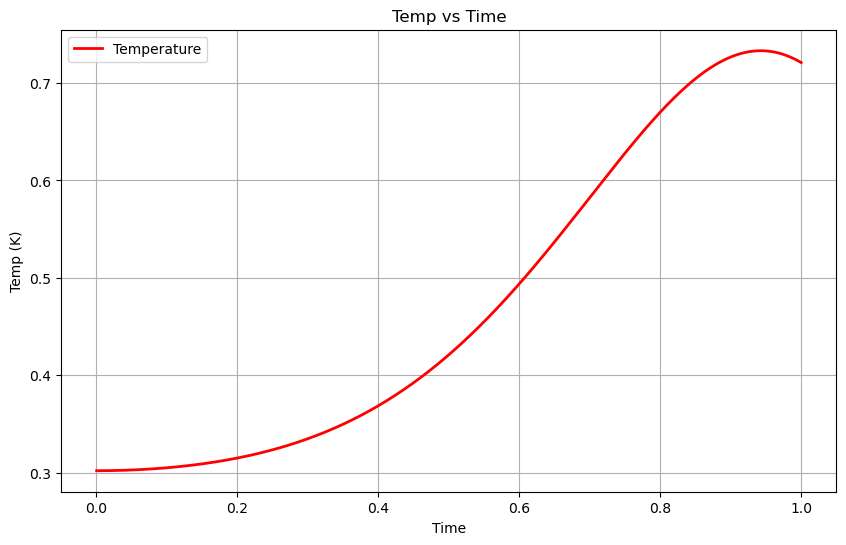

In [20]:
# plotting
final_x = [pos[0] for pos in all_positions[-1]]
final_y = [pos[1] for pos in all_positions[-1]]
initial_x = [pos[0] for pos in all_positions[0]]
initial_y = [pos[1] for pos in all_positions[0]]
X_grid, Y_grid = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
Z_potential =  (X_grid**2 - 1)**2 + Y_grid**2

# final positions
plt.figure(figsize=(8, 6))
plt.contour(X_grid, Y_grid, Z_potential, levels=50, cmap='coolwarm')
plt.colorbar(label='Potential Energy')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Double Well Potential Landscape')
plt.scatter(final_x, final_y, color='red', marker='x', label='Final Positions') # Overlay final positions
plt.legend()
plt.show()

# initial positions
plt.figure(figsize=(8, 6))
plt.contour(X_grid, Y_grid, Z_potential, levels=50, cmap='coolwarm')
plt.colorbar(label='Potential Energy')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2D Double Well Potential Landscape')
plt.scatter(initial_x, initial_y, color='green', marker='x', label='Initial Positions') 
plt.legend()
plt.show()

particles_to_plot_trajectories = min(10, N) # Plot up to 5 particles for clarity

# position (x) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_x'], label=f'P{i} X-pos', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Particle Positions Over Time (X Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# position (y) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_y'], label=f'P{i} Y-pos', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Particle Positions Over Time (Y Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# velocity (x) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_vx'], label=f'P{i} X-vel', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Particle Velocities Over Time (X Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# velocity (y) vs time
plt.figure(figsize=(12, 8))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_vy'], label=f'P{i} Y-vel', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Particle Velocities Over Time (Y Component)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# Energy
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['KE'], label='Total Kinetic Energy', color='orange')
plt.plot(df['time'], df['PE'], label='Total Potential Energy', color='purple')
plt.plot(df['time'], df['TE'], label='Total Energy', color='green', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Total Energies Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Temperature
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Temp'], label='Temperature', color='red', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Temp (K)')
plt.title('Temp vs Time')
plt.legend()
plt.grid(True)
plt.show()

Total simulation steps: 1000
Rendering 20 frames (skipping every 50 steps)
Saving animation to particle_dynamics_fast.mp4...
Animation saved successfully!


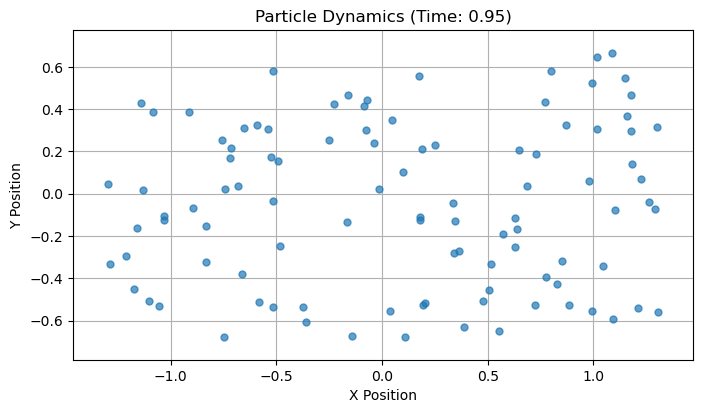

In [21]:
# feature to animate trajectory

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np

# Assuming 'df' DataFrame is already created from your simulation results
# N (number of particles) is also assumed to be defined.

# --- Prepare Data for Faster Access ---
# Convert relevant columns to NumPy arrays once for faster slicing in animate()
# This creates a list of NumPy arrays, where each array is (num_frames, 2) for x,y
# or (num_frames,) for individual particle components
particle_x_data = [df[f'particle_{i}_x'].values for i in range(N)]
particle_y_data = [df[f'particle_{i}_y'].values for i in range(N)]
time_data_np = df['time'].values # Convert time column to NumPy array

# --- Video Generation Setup ---

# 1. Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Determine robust plot limits from the entire dataset
x_min = df.filter(like='particle_').filter(like='_x').values.min() - 0.1
x_max = df.filter(like='particle_').filter(like='_x').values.max() + 0.1
y_min = df.filter(like='particle_').filter(like='_y').values.min() - 0.1
y_max = df.filter(like='particle_').filter(like='_y').values.max() + 0.1

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_aspect('equal', adjustable='box')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_title('Particle Dynamics (Time: 0.00)')
ax.grid(True)

# 2. Create an initial scatter plot
line, = ax.plot([], [], 'o', markersize=5, alpha=0.7) # `line` is an iterable, so unpack it

# --- Optimization Parameters ---
# Adjust these values to control video speed and generation time
frame_skip = 50  # Process every 10th frame. Higher value = faster generation, fewer frames
interval_ms = 50 # Milliseconds between frames in the *animation object*. Lower = faster playback
dpi = 150        # Dots per inch for output video. Lower = smaller file, faster render, lower quality

# 3. Define the animation update function
def animate(frame_idx):
    # Map the animated frame index to the actual data index
    actual_data_idx = frame_idx * frame_skip

    # Get positions for the current frame directly from NumPy arrays
    current_x_positions = [particle_x_data[i][actual_data_idx] for i in range(N)]
    current_y_positions = [particle_y_data[i][actual_data_idx] for i in range(N)]

    # Update the data for the scatter plot
    line.set_data(current_x_positions, current_y_positions)

    # Update the title to show the current time
    current_time = time_data_np[actual_data_idx]
    ax.set_title(f'Particle Dynamics (Time: {current_time:.2f})')
    
    return line, # Return the updated artist

# 4. Create the animation
total_frames_to_render = len(df) // frame_skip
if len(df) % frame_skip != 0: # Include the last frame if skipping doesn't land exactly on it
    total_frames_to_render += 1

print(f"Total simulation steps: {len(df)}")
print(f"Rendering {total_frames_to_render} frames (skipping every {frame_skip} steps)")

ani = animation.FuncAnimation(fig, animate, 
                              frames=total_frames_to_render, 
                              interval=interval_ms, 
                              blit=True)

# 5. Save the animation
# fps = 1000 / interval_ms
output_video_path = 'particle_dynamics_fast.mp4'
try:
    print(f"Saving animation to {output_video_path}...")
    ani.save(output_video_path, writer='ffmpeg', fps=1000/interval_ms, dpi=dpi)
    print("Animation saved successfully!")
except ValueError as e:
    print(f"Error saving animation: {e}")
    print("This often means FFmpeg is not found or not correctly configured.")
    print("Please ensure FFmpeg is installed and its executable is in your system's PATH.")
    print("You can usually check by typing 'ffmpeg -version' in your terminal/command prompt.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# If you want to display the animation in a Jupyter Notebook/IPython, uncomment this:
from IPython.display import HTML
HTML(ani.to_jshtml())


Simulation 1: Initial position = [-0.5, -0.5]
Simulation 1/121 completed.
Committor pB = 0.045, pA = 0.955

Simulation 2: Initial position = [-0.5, -0.4]
Simulation 2/121 completed.
Committor pB = 0.025, pA = 0.975

Simulation 3: Initial position = [-0.5, -0.3]
Simulation 3/121 completed.
Committor pB = 0.05, pA = 0.95

Simulation 4: Initial position = [-0.5, -0.19999999999999996]
Simulation 4/121 completed.
Committor pB = 0.04, pA = 0.96

Simulation 5: Initial position = [-0.5, -0.09999999999999998]
Simulation 5/121 completed.
Committor pB = 0.035, pA = 0.965

Simulation 6: Initial position = [-0.5, 0.0]
Simulation 6/121 completed.
Committor pB = 0.035, pA = 0.965

Simulation 7: Initial position = [-0.5, 0.10000000000000009]
Simulation 7/121 completed.
Committor pB = 0.025, pA = 0.975

Simulation 8: Initial position = [-0.5, 0.20000000000000007]
Simulation 8/121 completed.
Committor pB = 0.03, pA = 0.97

Simulation 9: Initial position = [-0.5, 0.30000000000000004]
Simulation 9/121 co

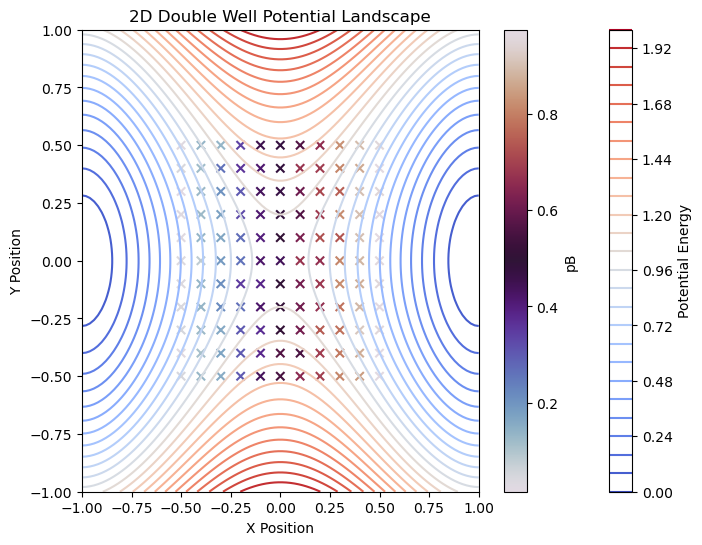

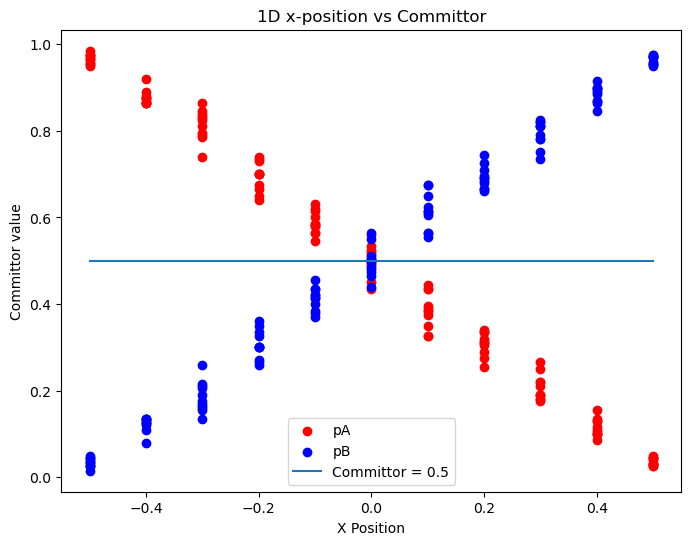

In [20]:
# written from scratch
# ver 2.5
# Using a 2D potential U(x,y) = (x^2-1)^2 + y^2
# rewritten to take multiple initial points and output committor distributions

import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --initialisation--

# 1) system set up
N = 200 # no. of particles
masses = [1.0 for i in range(N)] # masses of each of the particles
box_size = 4.0

# 2) defining forcefield 
# function to calculate force
# partial derivatives to calculate Fx and Fy
# Fx = -dU/dx , Fy = -dU/dy ; U(x,y) = (x^2-1)^2 + y^2
def calc_force(position_2D): # In the format [x,y]
    Fx = -4 * position_2D[0] * (position_2D[0]**2 - 1) 
    Fy = -2 * position_2D[1]
    return [Fx, Fy] # Outputs in a vector form as a list

# 3) simlulation parameters
n_steps = 1500 # time only until initial fall into basins
dt = 0.001 # time step

# PBC: 
def pbc(pos, box_size):
    x, y = pos[0], pos[1]
    half_box = box_size / 2.0

    # For x-coordinate
    if x > half_box:
        x -= box_size
    elif x < -half_box:
        x += box_size

    # For y-coordinate
    if y > half_box:
        y -= box_size
    elif y < -half_box:
        y += box_size
    
    return [x, y]

# committor function:
# committor: pB = no. of particles ending in B / N
def calc_committor(pos, N):
    final_pos_B = 0
    final_pos_A = 0
    for i in range(N): 
        if pos[-1][i][0] > 0: 
            final_pos_B += 1 
        elif pos[-1][i][0] < 0: 
            final_pos_A += 1
    pA = final_pos_A/N
    pB = final_pos_B/N
    return [pA, pB]

# list for holding pB values for each simulation
all_pA = []
all_pB = []
simulation_number = 1
    
# initial positions {x,y}
list_num = np.linspace(-0.5, 0.5, num=11)
list_positions = []
for i in list_num: 
    for j in list_num: 
        list_positions.append([i,j])

for value in list_positions: 
    init_pos = [value for i in range(N)]
    init_vel = [[random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)] for i in range(N)] # initial velocities {vx, vy}
    print(f'\nSimulation {simulation_number}: Initial position = {value}')
    
    # --simulation--
    time = 0.0
    positions = init_pos
    velocities = init_vel
    velocities_half = []
    
    # lists to save trajectory data
    all_times = []
    all_positions = []
    
    # main loop: integrator (3 step velocity verlet)
    for step in range(n_steps):
        
        # calculating forces at the beginning of the loop
        forces = [calc_force(positions[i]) for i in range(N)] 
        
        # calculating x and y components of velocities at dt/2 according to these forces 
        velocities_half_temp = []
        positions_temp = []
    
        for i in range(N):
            velocities_x_half = velocities[i][0] + 0.5*dt *forces[i][0]/masses[i]  
            velocities_y_half = velocities[i][1] + 0.5*dt *forces[i][1]/masses[i]  
            velocities_half_temp.append([velocities_x_half, velocities_y_half])
            
        # calculating positions at dt
            positions_x = positions[i][0] + dt*velocities_x_half
            positions_y = positions[i][1] + dt*velocities_y_half
    
            #PBC:
            wrapped_pos = pbc([positions_x, positions_y], box_size)
            positions_temp.append(wrapped_pos)
            
        positions = positions_temp
            
        # recaclculating forces for new positions (dt)
        forces = [calc_force(positions[i]) for i in range(N)]
        
        # calculating velocities at dt according to the new forces
        velocities_temp = []
        for i in range(N):
            velocities_x = velocities_half_temp[i][0] + 0.5*dt *forces[i][0]/masses[i] 
            velocities_y = velocities_half_temp[i][1] + 0.5*dt *forces[i][1]/masses[i] 
            velocities_temp.append([velocities_x, velocities_y])
            
        velocities = velocities_temp
            
        time += dt
    
        # saving the positions and velocities 
        all_times.append(time)
        all_positions.append(positions)
        #if step%(n_steps/10) == 0 or step == n_steps-1: # terminal output once every 100 steps
            #print(f"Step: {step}, Time: {time:.2f}")
    
    print(f"Simulation {simulation_number}/{len(list_positions)} completed.")
    simulation_number += 1
    
    # output CSV
    #df.to_csv('md_out.csv', index=False)
    #print(f'Output CSV file: md_out.csv')
    
    # displaying committor results
    comm = calc_committor(all_positions, N)
    pA = comm[0]
    pB = comm[1]
    print(f'Committor pB = {pB}, pA = {pA}')

    all_pA.append(pA)
    all_pB.append(pB)

print("All simulations complete.")

# Plotting the results:
# plotting pB vs position plot
initial_x = [pos[0] for pos in list_positions]
initial_y = [pos[1] for pos in list_positions]
X_grid, Y_grid = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
Z_potential =  (X_grid**2 - 1)**2 + Y_grid**2
colors = np.array([pB for pB in all_pB])

# initial positions colormapped to pB
plt.figure(figsize=(8, 6))
plt.contour(X_grid, Y_grid, Z_potential, levels=25, cmap='coolwarm')
plt.colorbar(label='Potential Energy')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'2D Double Well Potential Landscape')
plt.scatter(initial_x, initial_y, c=colors, cmap = 'twilight', marker='x', label='Initial Positions') 
plt.colorbar(label='pB')
plt.show()

# final x-positions and committor plot
pb_50_line_x = [-0.5, 0.5]
pb_50_line_y = [0.5, 0.5]
plt.figure(figsize=(8, 6))
plt.xlabel('X Position')
plt.ylabel('Committor value')
plt.title(f'1D x-position vs Committor')
plt.scatter(initial_x, all_pA, color = 'red', label = 'pA')
plt.scatter(initial_x, all_pB, color = 'blue', label = 'pB') 
plt.plot(pb_50_line_x, pb_50_line_y, label = 'Committor = 0.5')
plt.legend()
plt.show()

#stdev_pB = math.sqrt((pB*(1.0 - pB))/N) # Standard deviation
#print(f'Standard deviation of pB (σ) = {stdev_pB}')

#print(df[f'particle_1_x'][N-1])

In [16]:
#list_num = np.linspace(-2.0, 2.0, num=5)
#list_positions = []
#for i in list_num: 
#    for j in list_num: 
#        list_positions.append([i,j])
#for value in list_positions: 
#    init_pos = [value for i in range(N)]
    
    #print(len(init_pos))
    
#print(list_positions)

def calc_committor(pos, N):
    final_pos_B = 0
    final_pos_A = 0
    for i in range(N): 
        if pos[-1][i][0] > 0: 
            final_pos_B += 1 
        elif pos[-1][i][0] < 0: 
            final_pos_A += 1
    pA = final_pos_A/N
    pB = final_pos_B/N
    return [pA, pB]
    
#print(all_positions[-1][1][0])
# displaying committor results
comm = calc_committor(all_positions, N)
pA = comm[0]
pB = comm[1]
print(f'Committor pB = {pB}')
print(f'\npA = {pA}')

Committor pB = 0.785

pA = 0.215


In [65]:
    # plotting (for each simulation)
    final_x = [pos[0] for pos in all_positions[-1]]
    final_y = [pos[1] for pos in all_positions[-1]]
    initial_x = [pos[0] for pos in all_positions[0]]
    initial_y = [pos[1] for pos in all_positions[0]]
    X_grid, Y_grid = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    Z_potential =  (X_grid**2 - 1)**2 + Y_grid**2
    
    # final positions
    plt.figure(figsize=(8, 6))
    plt.contour(X_grid, Y_grid, Z_potential, levels=50, cmap='coolwarm')
    plt.colorbar(label='Potential Energy')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(f'2D Double Well Potential Landscape (pB = {pB})')
    plt.scatter(final_x, final_y, color='red', marker='x', label='Final Positions') # Overlay final positions
    plt.scatter(initial_x, initial_y, color='green', marker='x', label='Initial Positions') 

    plt.legend()
    plt.show()

[[-1.0, -1.0],
 [-1.0, -0.8],
 [-1.0, -0.6],
 [-1.0, -0.3999999999999999],
 [-1.0, -0.19999999999999996],
 [-1.0, 0.0],
 [-1.0, 0.20000000000000018],
 [-1.0, 0.40000000000000013],
 [-1.0, 0.6000000000000001],
 [-1.0, 0.8],
 [-1.0, 1.0],
 [-0.8, -1.0],
 [-0.8, -0.8],
 [-0.8, -0.6],
 [-0.8, -0.3999999999999999],
 [-0.8, -0.19999999999999996],
 [-0.8, 0.0],
 [-0.8, 0.20000000000000018],
 [-0.8, 0.40000000000000013],
 [-0.8, 0.6000000000000001],
 [-0.8, 0.8],
 [-0.8, 1.0],
 [-0.6, -1.0],
 [-0.6, -0.8],
 [-0.6, -0.6],
 [-0.6, -0.3999999999999999],
 [-0.6, -0.19999999999999996],
 [-0.6, 0.0],
 [-0.6, 0.20000000000000018],
 [-0.6, 0.40000000000000013],
 [-0.6, 0.6000000000000001],
 [-0.6, 0.8],
 [-0.6, 1.0],
 [-0.3999999999999999, -1.0],
 [-0.3999999999999999, -0.8],
 [-0.3999999999999999, -0.6],
 [-0.3999999999999999, -0.3999999999999999],
 [-0.3999999999999999, -0.19999999999999996],
 [-0.3999999999999999, 0.0],
 [-0.3999999999999999, 0.20000000000000018],
 [-0.3999999999999999, 0.400000000

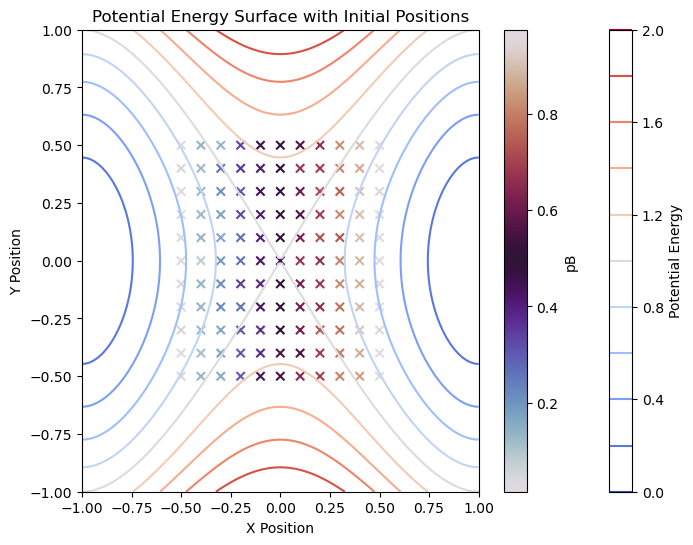

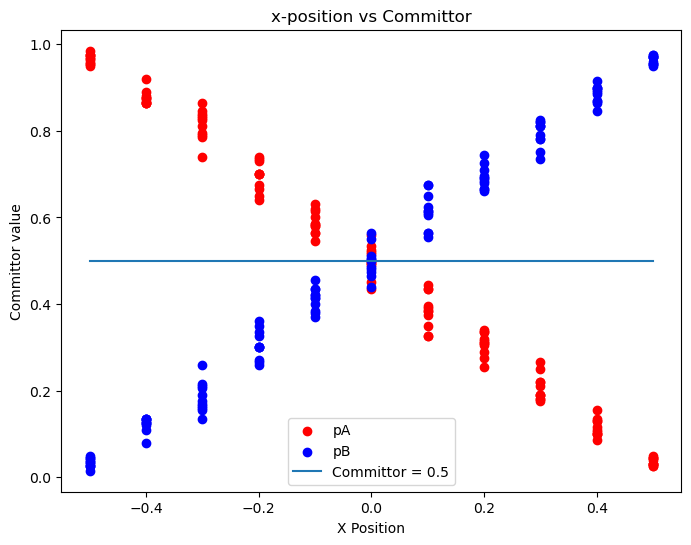

In [23]:
from matplotlib import colormaps
# plotting pB vs position plot
initial_x = [pos[0] for pos in list_positions]
initial_y = [pos[1] for pos in list_positions]
X_grid, Y_grid = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
Z_potential =  (X_grid**2 - 1)**2 + Y_grid**2
colors = np.array([pB for pB in all_pB])

# final positions
plt.figure(figsize=(8, 6))
plt.contour(X_grid, Y_grid, Z_potential, levels=10, cmap='coolwarm')
plt.colorbar(label='Potential Energy')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Potential Energy Surface with Initial Positions')
plt.scatter(initial_x, initial_y, c=colors, cmap = 'twilight', marker='x', label='Initial Positions') 
plt.colorbar(label='pB')
plt.show()

# final x-positions and pB plot
pb_50_line_x = [-0.5, 0.5]
pb_50_line_y = [0.5, 0.5]
plt.figure(figsize=(8, 6))
plt.xlabel('X Position')
plt.ylabel('Committor value')
plt.title(f'x-position vs Committor')
plt.scatter(initial_x, all_pA, color = 'red', label = 'pA')
plt.scatter(initial_x, all_pB, color = 'blue', label = 'pB') 
plt.plot(pb_50_line_x, pb_50_line_y, label = 'Committor = 0.5')
plt.legend()
plt.show()
